# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing the boston house price prediction dataset
from sklearn.datasets import load_boston
#importing train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split

# Load the dataset, check description and preprocessing

In [3]:
#storing the dataset in a variable
dataset = load_boston()

In [4]:
#what's inside the dataset?
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
#description of the dataset e.g. number of instances and attributes, information about the attributes etc.
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#store the dataset as a pandas dataframe
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#but why is the target "MEDV" missing?
#because dataset.data contains only the attribute values, target values are in dataset.target
#append target variable "MEDV"
df["MEDV"] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#it's recommended to check for the missing values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
#let's check descriptive statistics of the dataset e.g. mean, max, min, std etc. of each feature vector
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory data analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


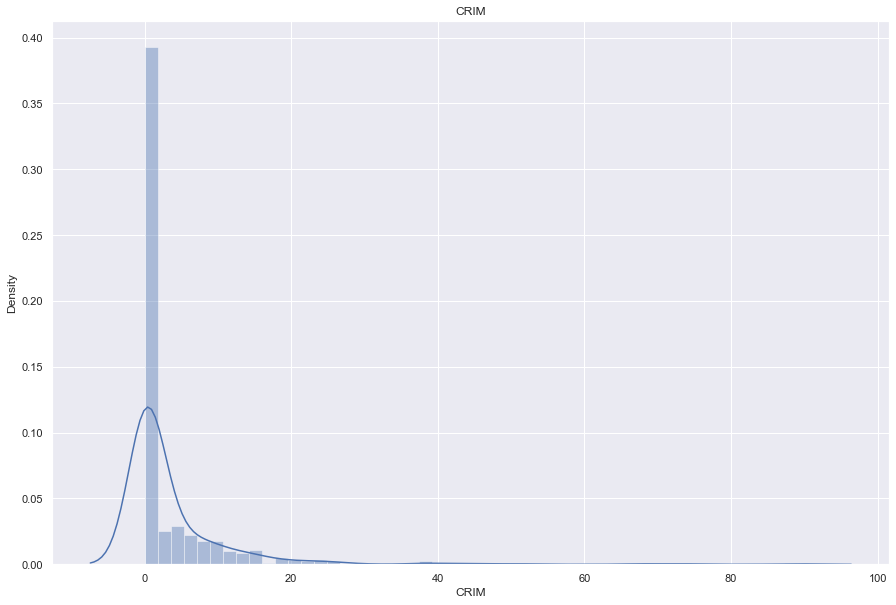

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


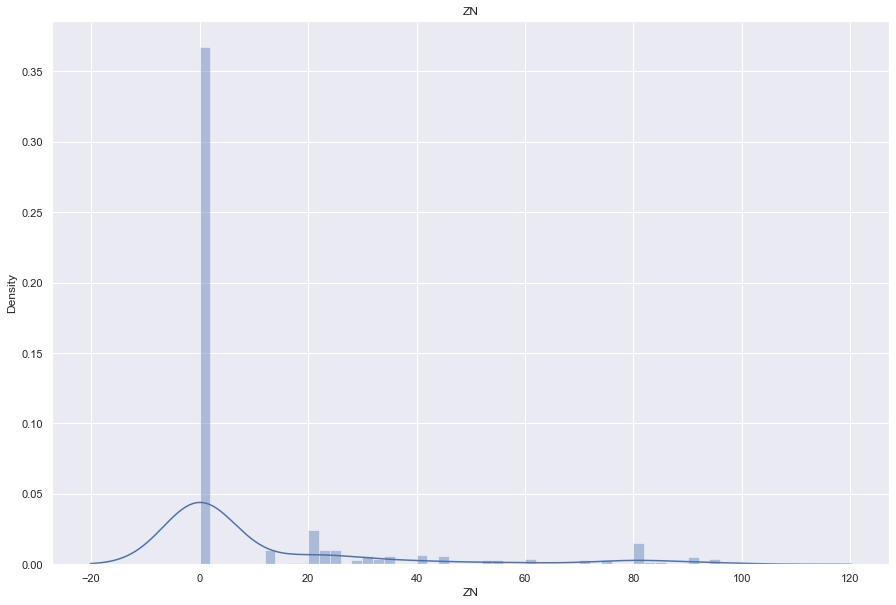

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


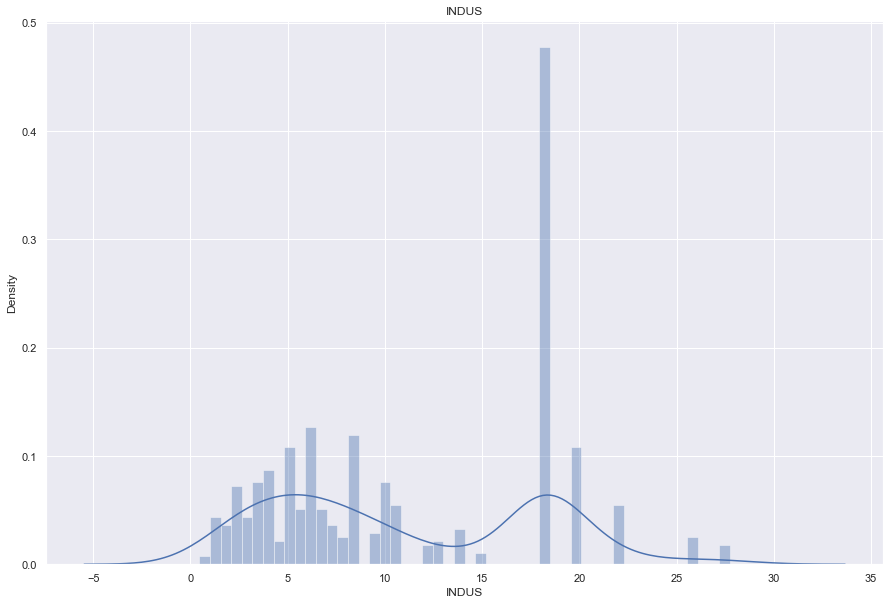

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


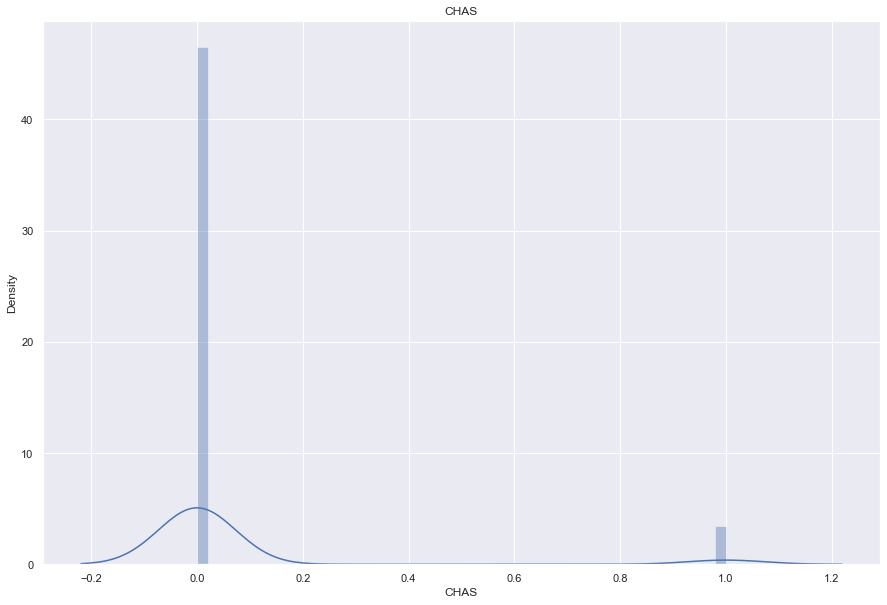

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


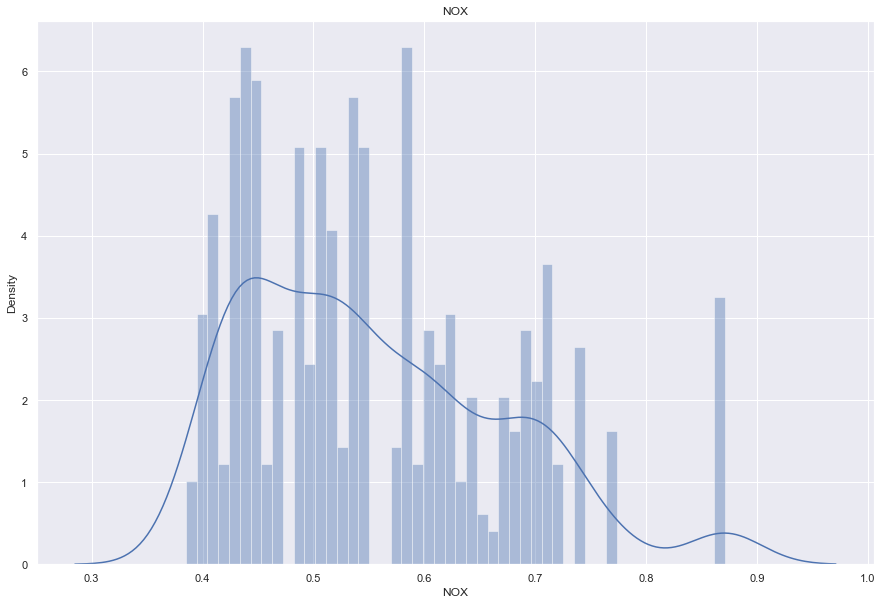

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


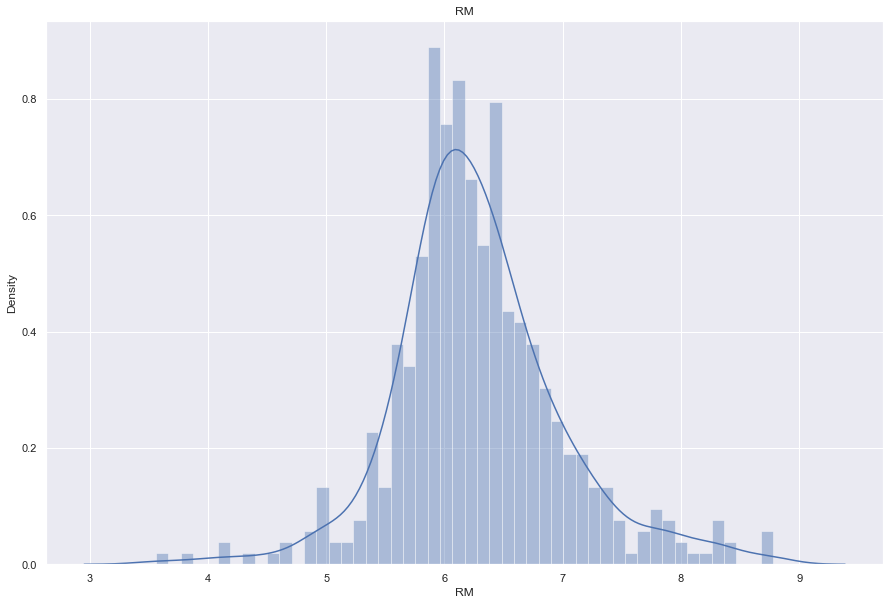

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


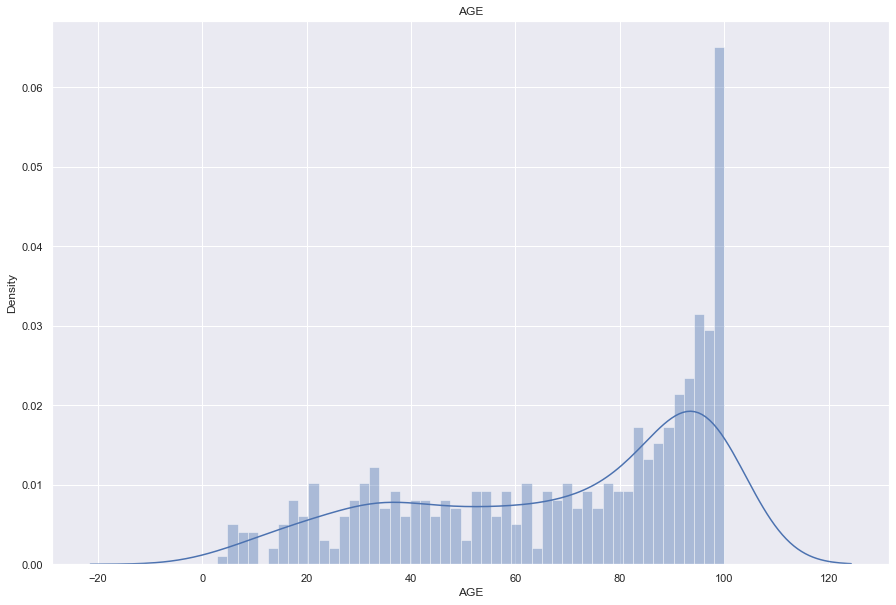

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


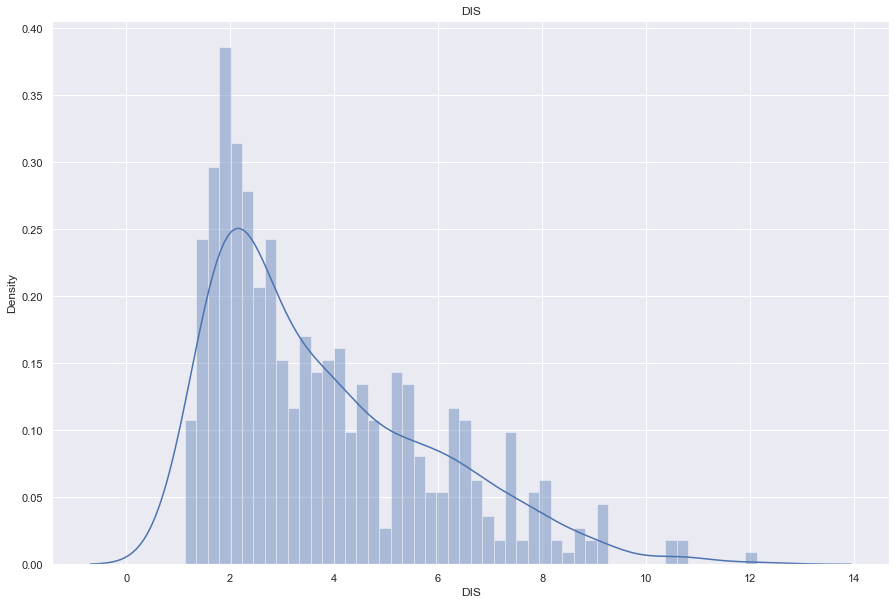

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


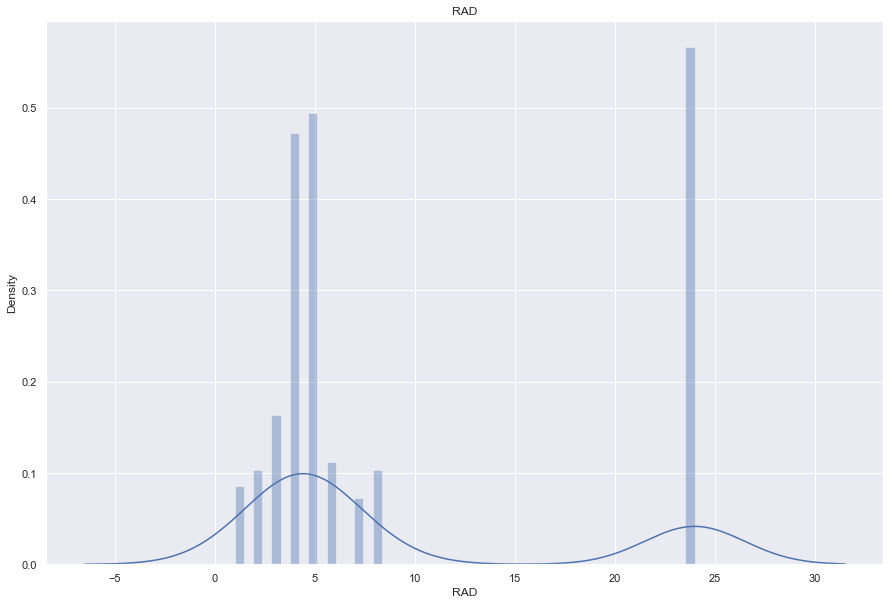

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


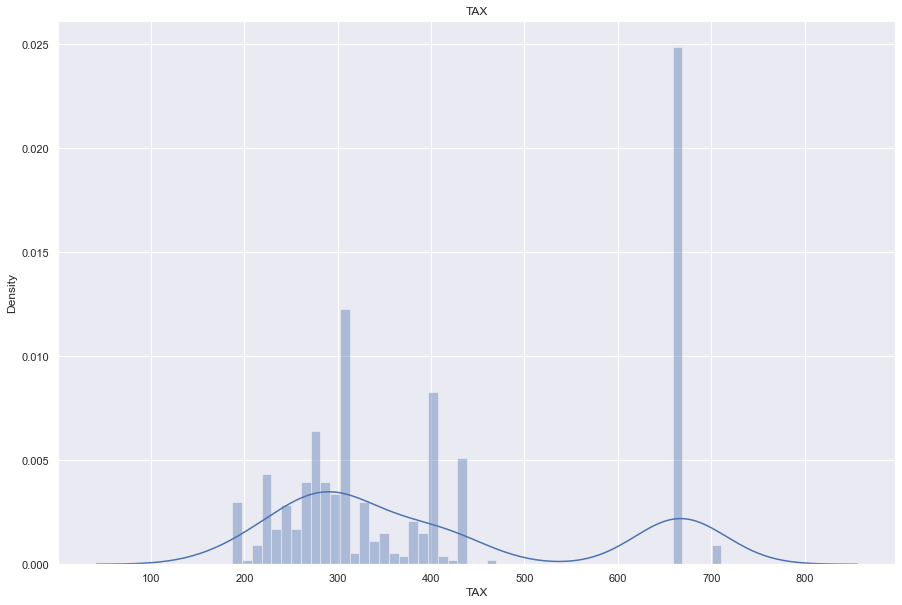

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


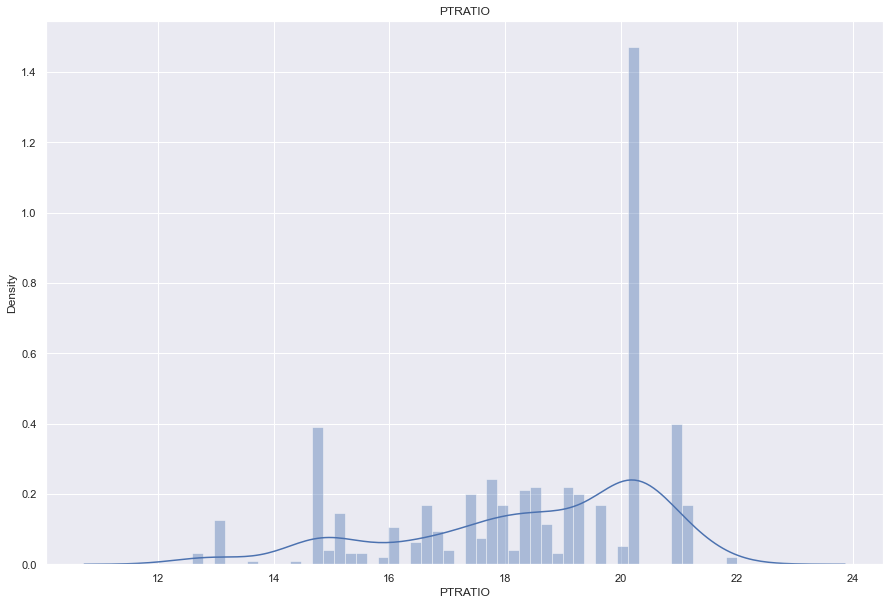

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


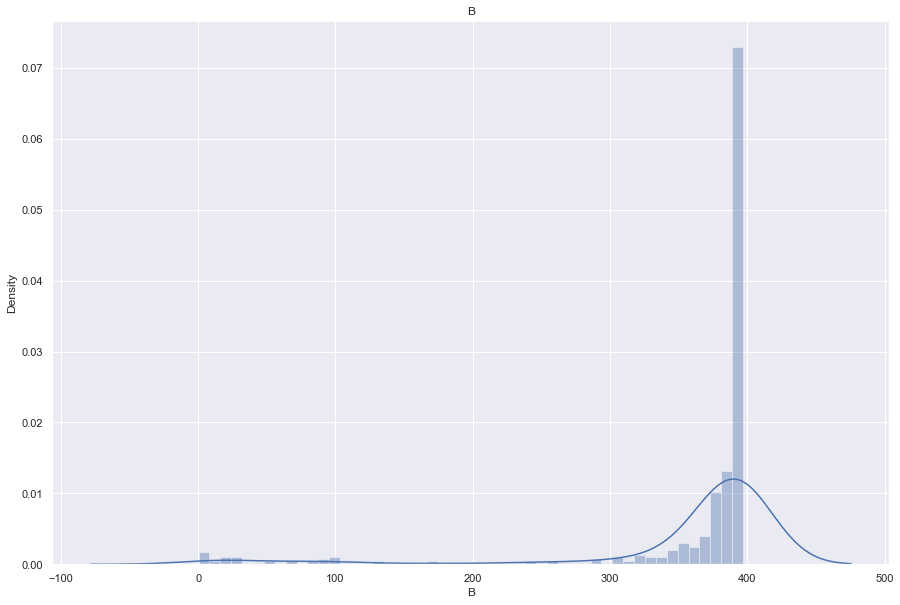

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


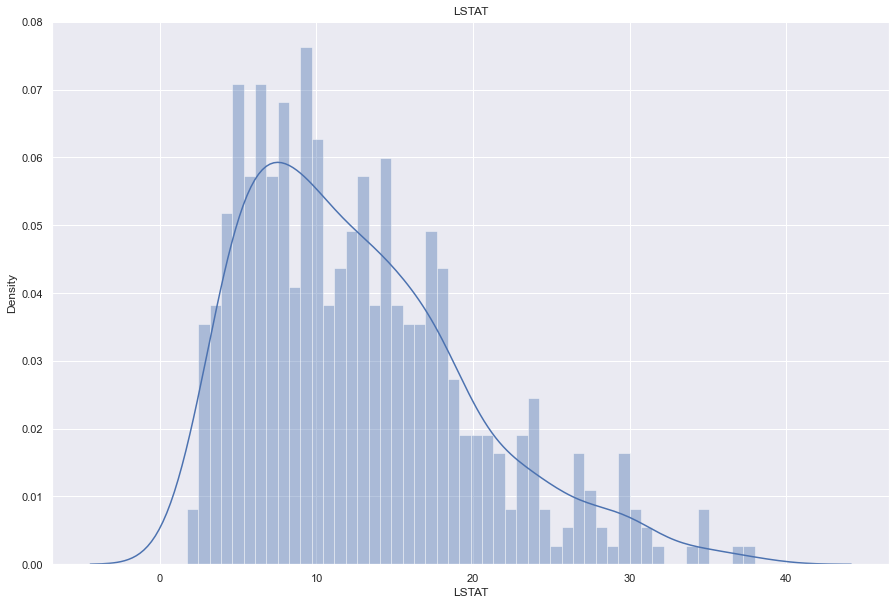

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


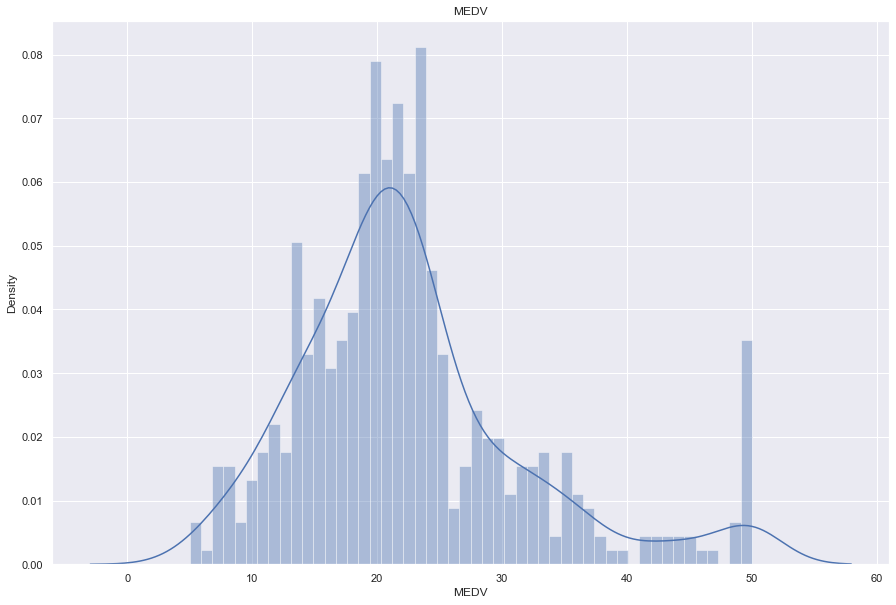

In [12]:
#data distribution of each attribute
sns.set(rc = {"figure.figsize" : (15, 10)})

for attribute in df.keys():
    sns.distplot(df[attribute], bins = 50)
    plt.title(attribute)
    plt.show()

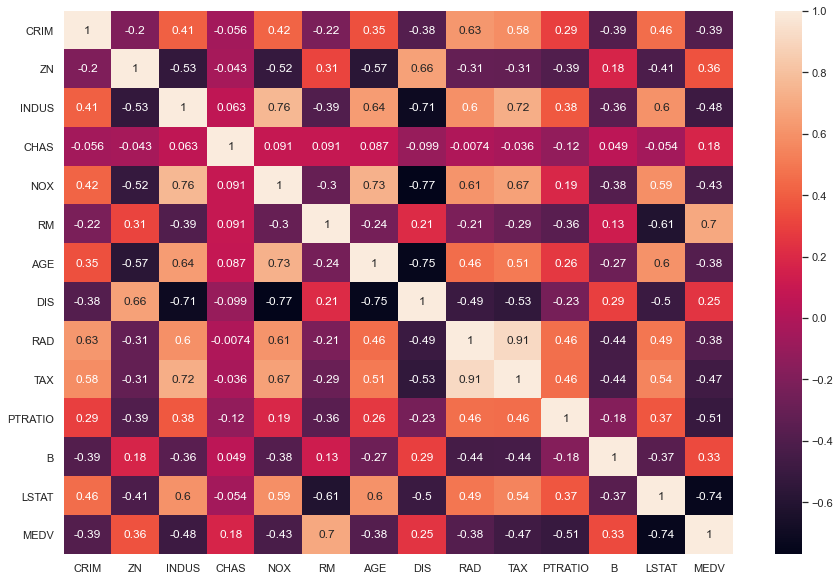

In [13]:
#correlation matrix to measure the linear relationships between the variables
corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.show()
#prints the values inside the square if annot is True
#the correlation coefficient ranges from -1 to 1
#if the value is close to 1, there is a strong positive correlation between the variables
#there is a strong negative correlation if the value is close to -1

In [14]:
#we should choose the features that have a high correlation with the target variable
#before selecting the feature for training it's important to check for multi-co-linearity
#here "RAD" and "TAX" are highly correlated since the coefficient value is 0.91
#therefore we should not use both of those feature for training

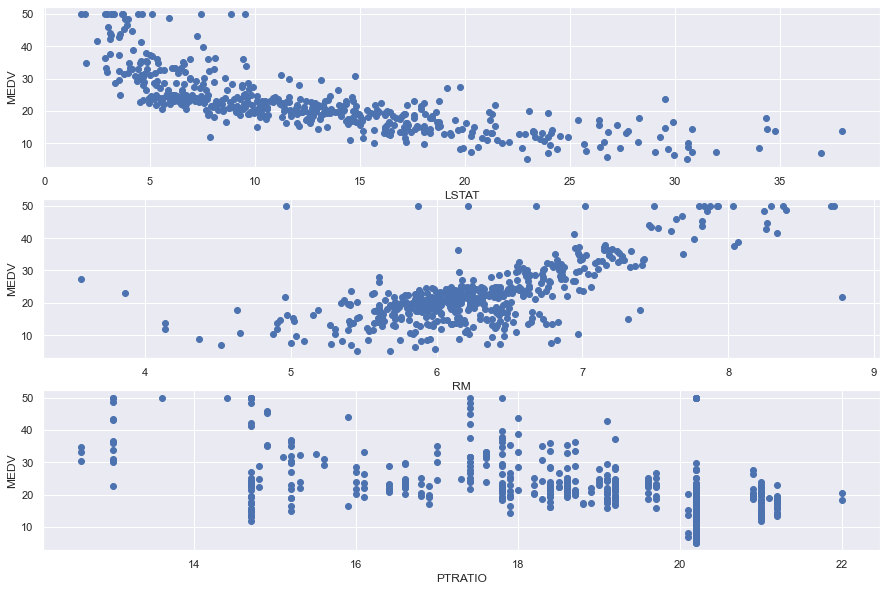

In [15]:
#we choose "RM" and "LSTAT" since both of the feature is highly correlated with the target "MEDV"
#"RM" vs "MEDV" is 0.7 and (strong positive correlation)
#"LSTAT" vs "MEDV" is -0.74 (strong negative correlation)
#now let's plot "RM" vs "MEDV", "LSTAT" vs "MEDV" and "PTRATIO" vs "MEDV"
fig, ax = plt.subplots(3, figsize = (15, 10))
ax[0].scatter(df["LSTAT"], df["MEDV"])
ax[0].set_xlabel("LSTAT")
ax[0].set_ylabel("MEDV")

ax[1].scatter(df["RM"], df["MEDV"])
ax[1].set_xlabel("RM")
ax[1].set_ylabel("MEDV")

ax[2].scatter(df["PTRATIO"], df["MEDV"])
ax[2].set_xlabel("PTRATIO")
ax[2].set_ylabel("MEDV")

plt.show()

In [16]:
#the prices increase as the value of "RM" increases and opposite in the case of "LSTAT" vs "MEDV"
#"PTRATIO" vs "MEDV" seems like doesn't follow a line unlike "RM" vs "MEDV" and "LSTAT" vs "MEDV"
#we can use "PTRATIO" since the correlation coefficient is -0.51 but likely it won't help that much
#so let's use only "RM" and "LSTAT" as x or the inputs and "MEDV" is our target
#select and append the selected features in a dataframe
X = pd.concat((df["LSTAT"], df["RM"]), axis = 1)
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [17]:
y = pd.DataFrame(df["MEDV"])
y.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [18]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
#test_size = 0.2 means 20% of the dataset will be used for testing
#random_state ensures that the splits generated are reproducible, it is used as a seed to the random number generator

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#now the data is ready to build a model

(404, 2) (404, 1)
(102, 2) (102, 1)


# Gradient descent

In [21]:
#now we have the train and test set
#we have to find the optimal values for w and b that minimizes the cost fuction
#using gradient descent we will try to find those values
def update_w_and_b(x, y, w, b, alpha):
    """this function updates the model parameters w and b,
    function arguments are x(input feature), y(output or the target), w, b, learning rate alpha
    """
    dl_dw = 0
    dl_db = 0
    N = len(x)
    for i in range(N):
        dl_dw += -2*x[i]*(y[i] - (w*x[i] +b))
        dl_db += -2*(y[i] - (w*x[i] + b))
    w = w - (1 / float(N)) * dl_dw*alpha
    b = b - (1 / float(N)) * dl_db*alpha
    return w, b

In [25]:
from matplotlib.pyplot import figure
def train(x, y, w, b, alpha, epochs):
    """this function searches for the best value for the parameters w and b,
    it takes x, y, w and b where w and b both are initially 0,
    the function loops the training set 
    """
    avg_loss_list = []
    w_list = []
    b_list = []
    img_list = []
    pred_val_at_diff_epoch = []
    for num_of_epochs in range(epochs):
        w, b = update_w_and_b(x, y, w, b, alpha)
        if num_of_epochs%10 == 0:
            avg_loss_val = avg_loss(x, y, w, b)
            w_list.append(w)
            b_list.append(b)
            avg_loss_list.append(avg_loss_val)
        if num_of_epochs%5000 == 0:
            avg_loss_val = avg_loss(x, y, w, b)
            print("epoch: ", num_of_epochs,"average loss: ",avg_loss_val)
            figure(figsize = (15, 10))
            plt.title(f"Epoch: {num_of_epochs}")
            plt.xlabel("X")
            plt.ylabel("y")
            plt.xlim(0, 9)
            plt.ylim(0, 50)
            plt.scatter(x, y)
            plt.scatter(x, predict(x, w, b))
            
            plt.savefig(f"{num_of_epochs}.png")
            img_list.append(f"{num_of_epochs}.png")
            
            plt.show()
            
            pred_val_at_diff_epoch.append(predict(x[0], w, b))
    return w_list,b_list, avg_loss_list, w, b, img_list, pred_val_at_diff_epoch

In [26]:
def avg_loss(x, y, w, b):
    N = len(x)
    total_error = 0
    for i in range(N):
        total_error += (y[i] - (w*x[i]+b))**2
    return total_error/float(N)

In [27]:
def predict(x, w, b):
    return w*x+b

epoch:  0 average loss:  573.0312769351891


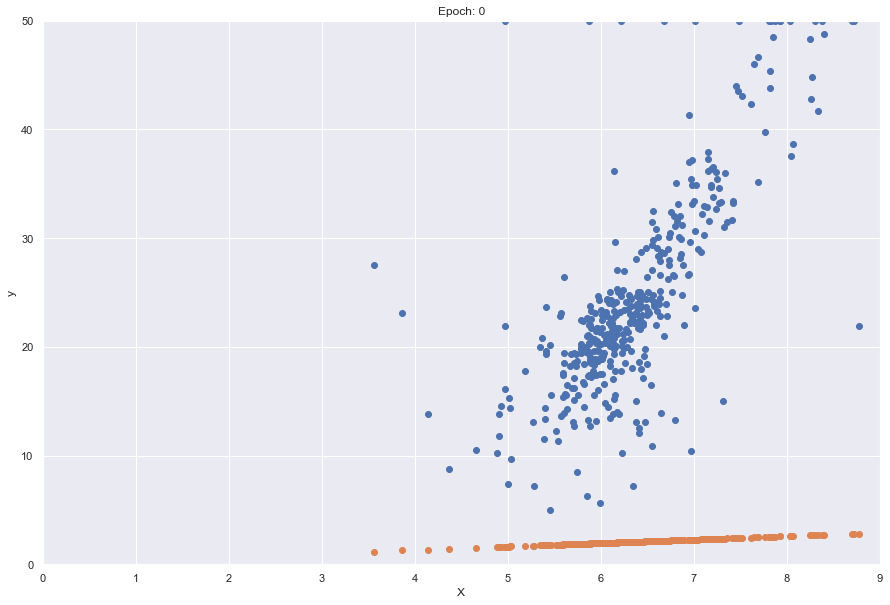

epoch:  5000 average loss:  50.981390807712465


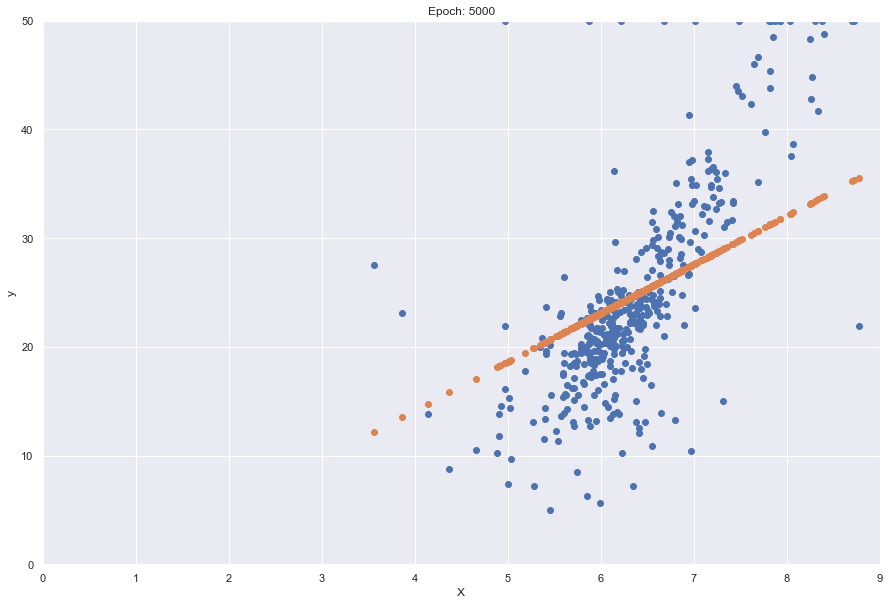

epoch:  10000 average loss:  47.99433539940299


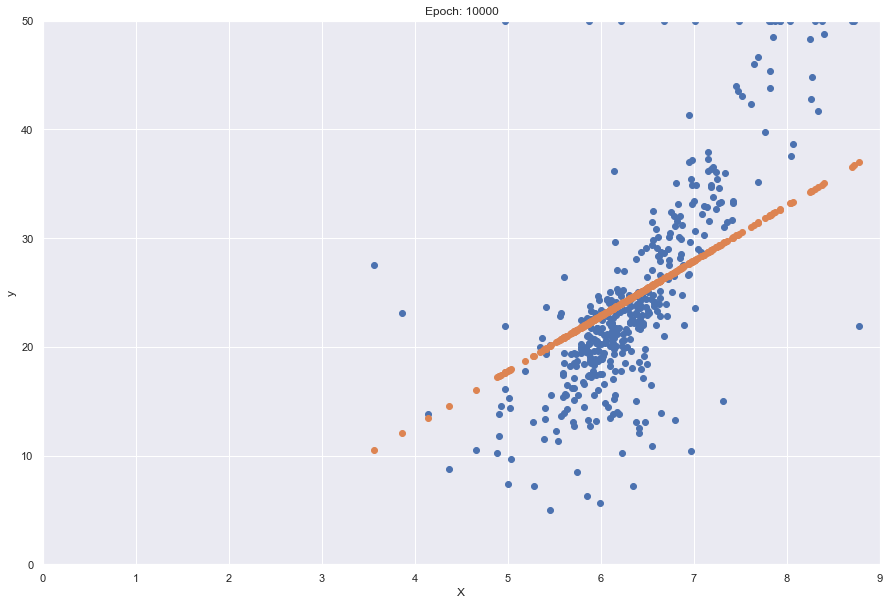

epoch:  15000 average loss:  45.68200311830662


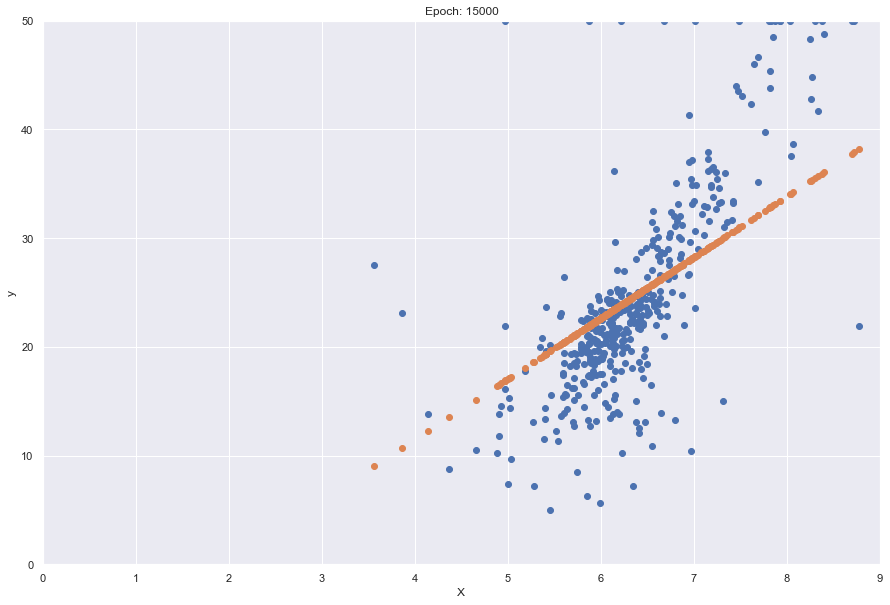

epoch:  20000 average loss:  43.89198591162


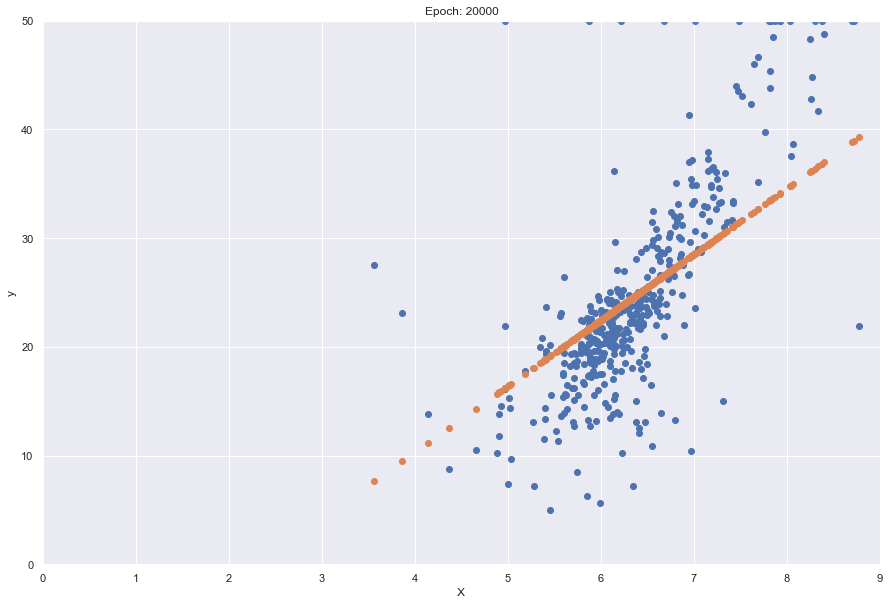

epoch:  25000 average loss:  42.50630201729887


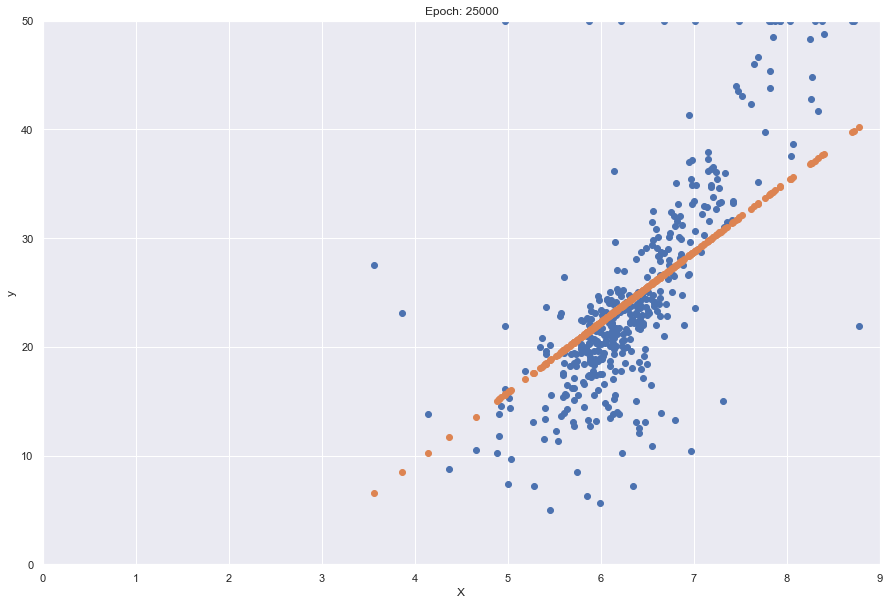

epoch:  30000 average loss:  41.43361967223069


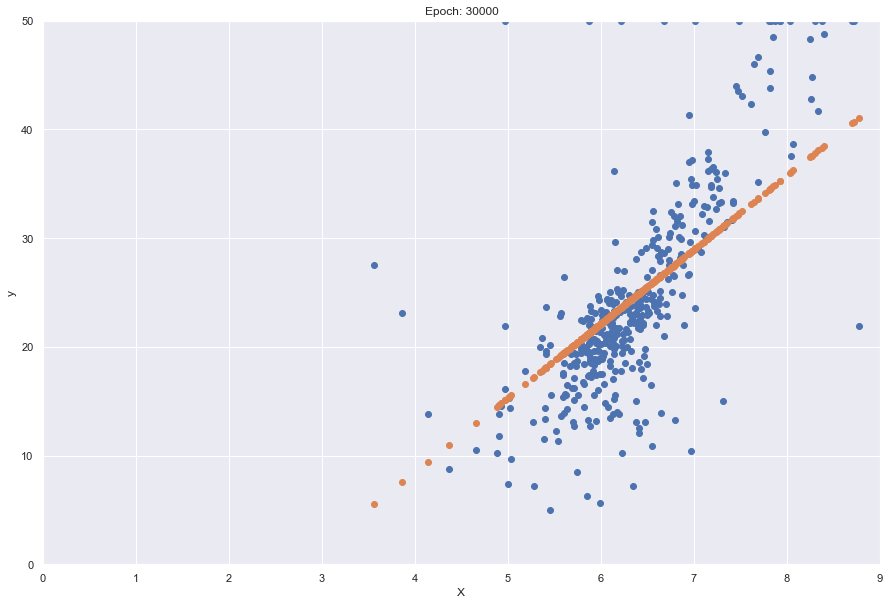

epoch:  35000 average loss:  40.60323734756295


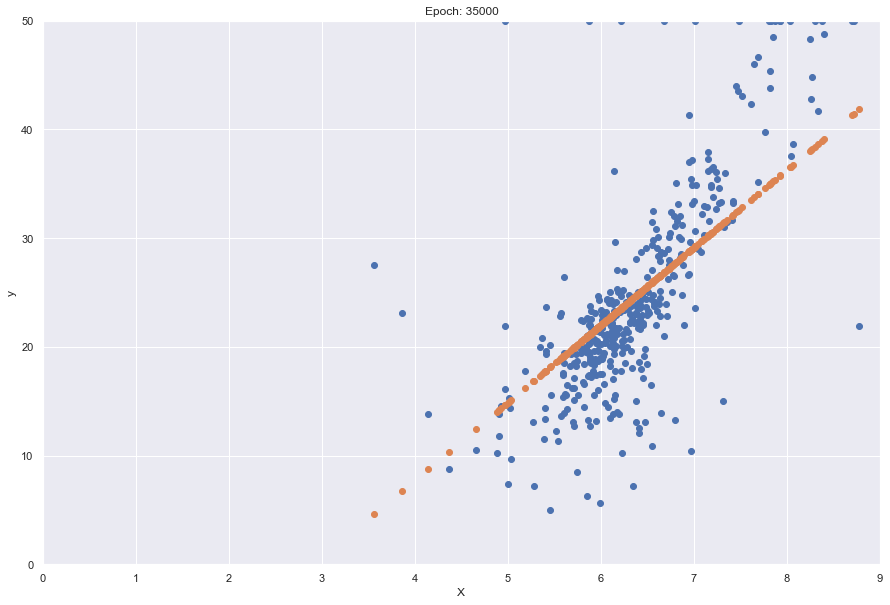

epoch:  40000 average loss:  39.9604237426865


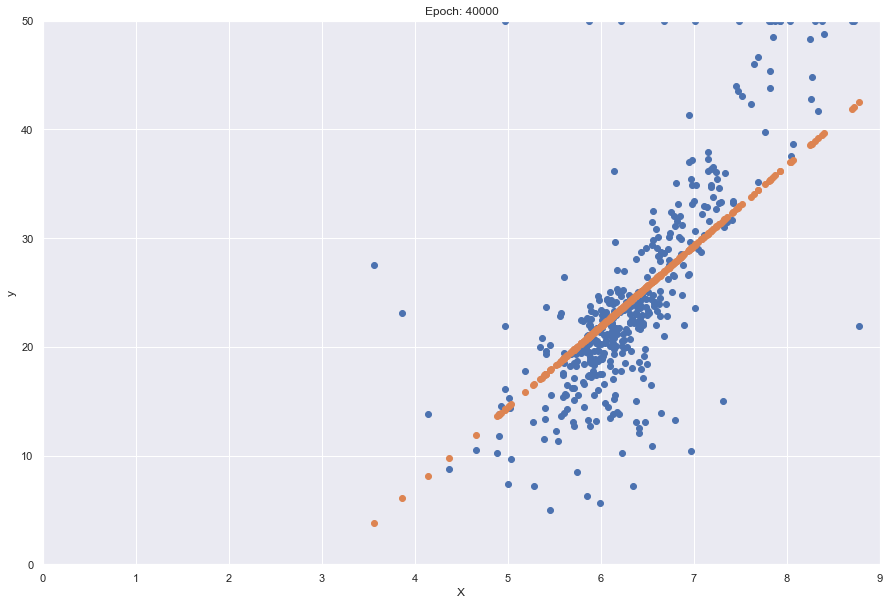

epoch:  45000 average loss:  39.462810392378785


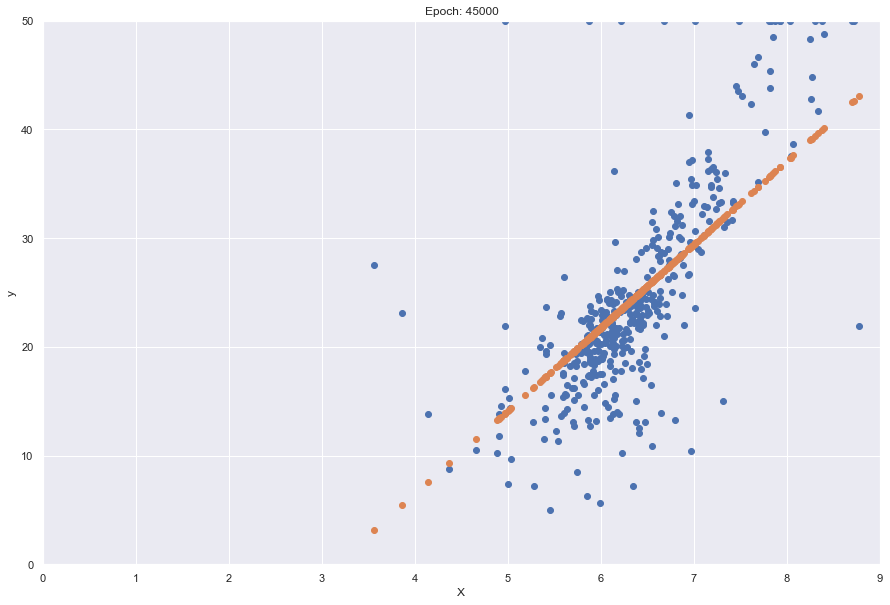

epoch:  50000 average loss:  39.07759912036151


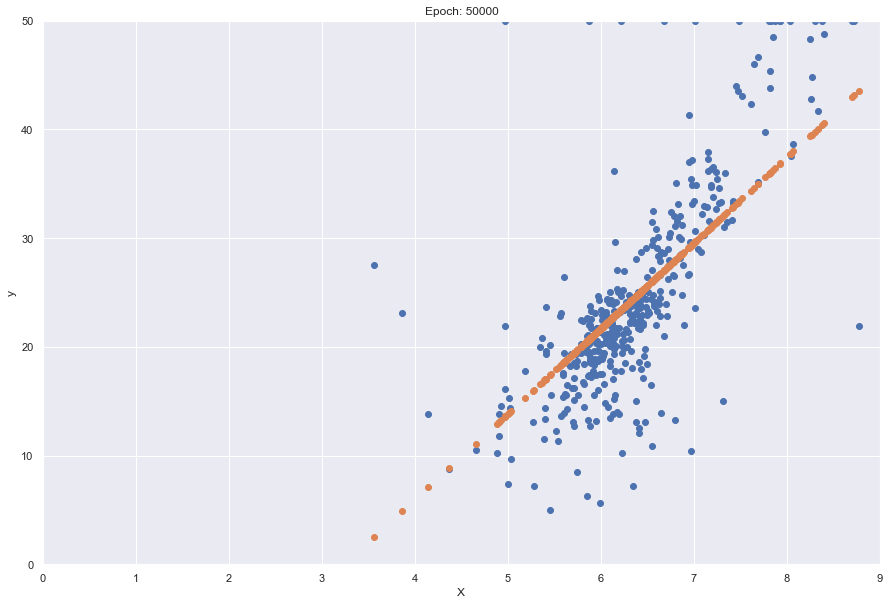

epoch:  55000 average loss:  38.77940027984123


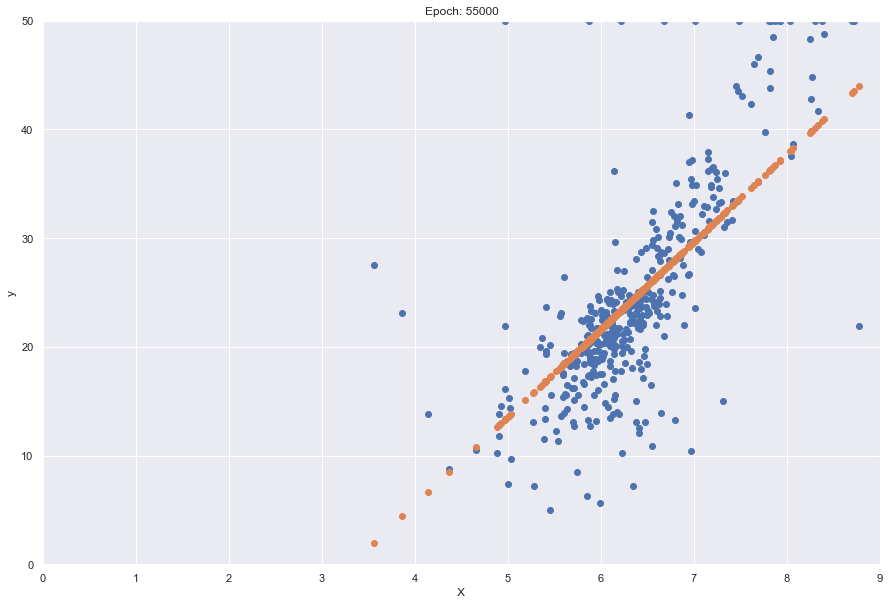

epoch:  60000 average loss:  38.54855929737991


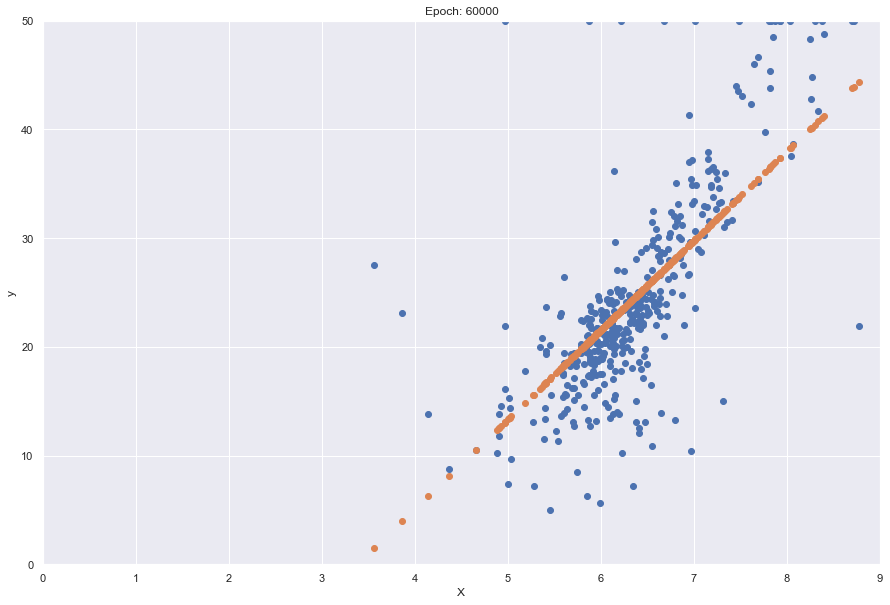

epoch:  65000 average loss:  38.36986122098657


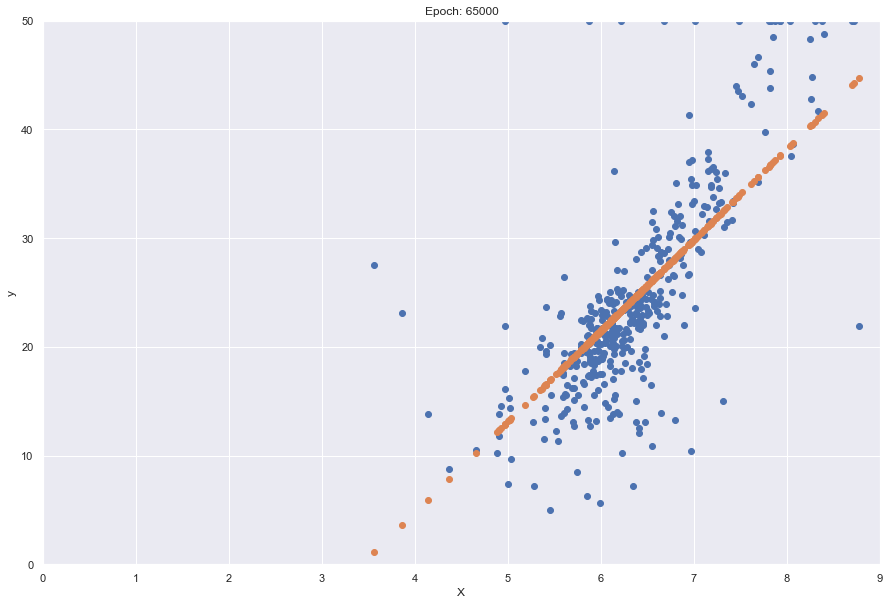

epoch:  70000 average loss:  38.231527887944026


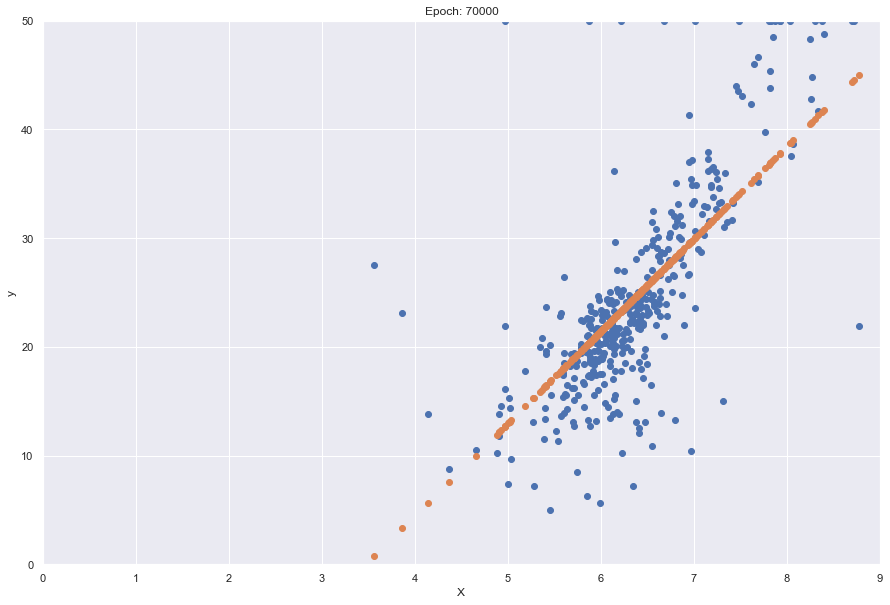

epoch:  75000 average loss:  38.124441614734586


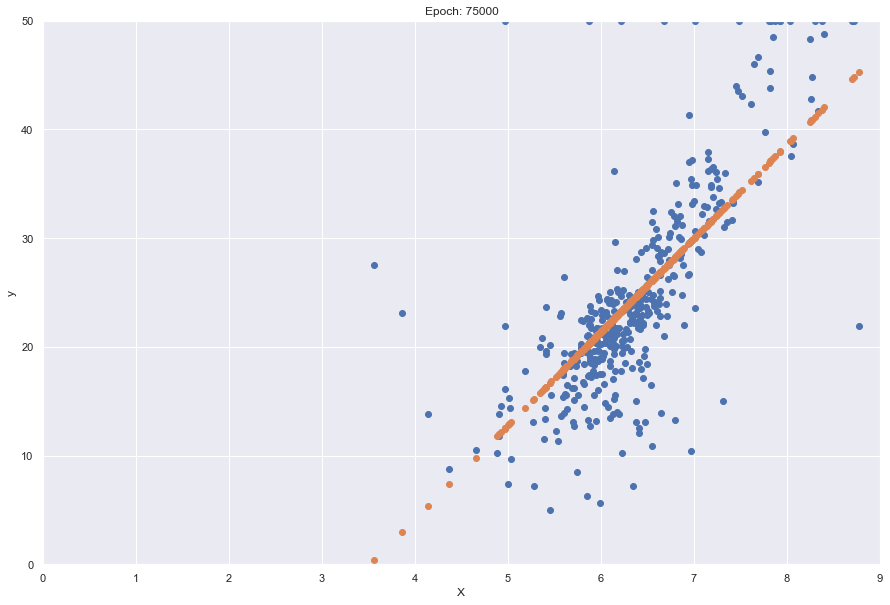

epoch:  80000 average loss:  38.041544241717766


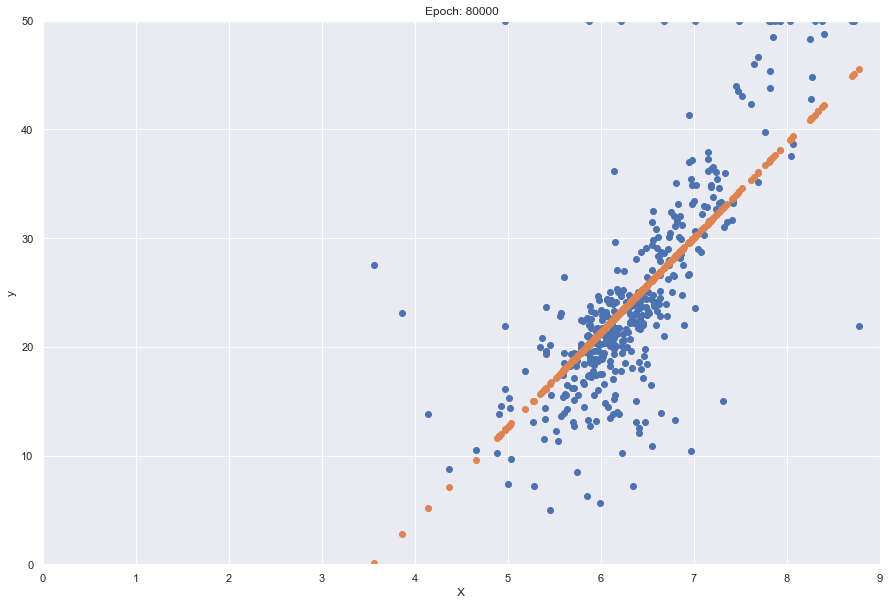

epoch:  85000 average loss:  37.97737192301504


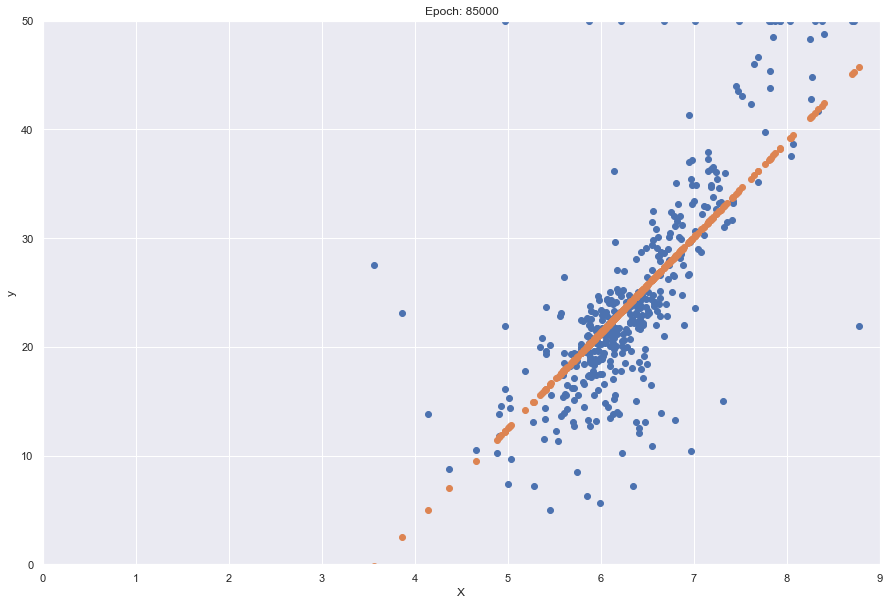

epoch:  90000 average loss:  37.92769499915335


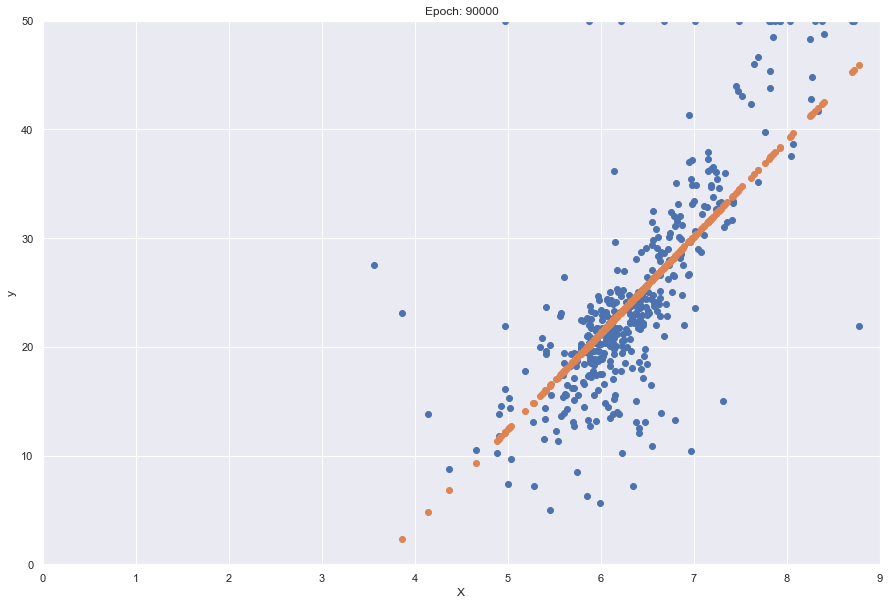

epoch:  95000 average loss:  37.8892392161266


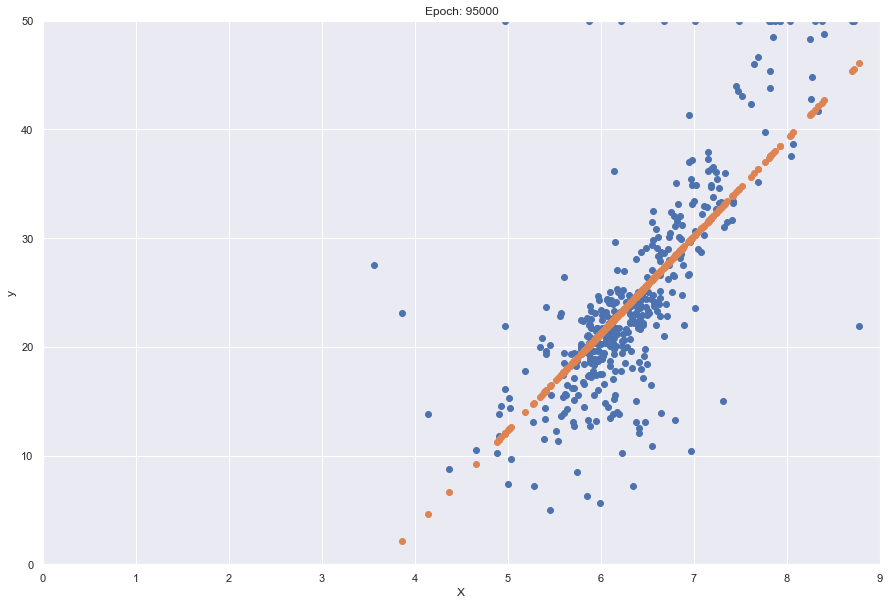

In [28]:
#first we will experiment using "RM" (x) and "MEDV" (y)
w_list,b_list, avg_loss_list, w, b, img_list, pred_val_at_diff_epoch = train(df["RM"][0:403], df["MEDV"][0:403], 0, 0, 0.001, 100000)

In [29]:
print(len(w_list))
print(len(b_list))
print(len(avg_loss_list))
print("best value for w: ",w)
print("best value for b: ",b)
print(len(img_list))
print(len(pred_val_at_diff_epoch))

10000
10000
10000
best value for w:  8.991212312865795
best value for b:  -32.71343752742647
20
20


In [30]:
n = np.linspace(10, 100000, 10000, endpoint = True)
len(n), n

(10000,
 array([1.000e+01, 2.000e+01, 3.000e+01, ..., 9.998e+04, 9.999e+04,
        1.000e+05]))

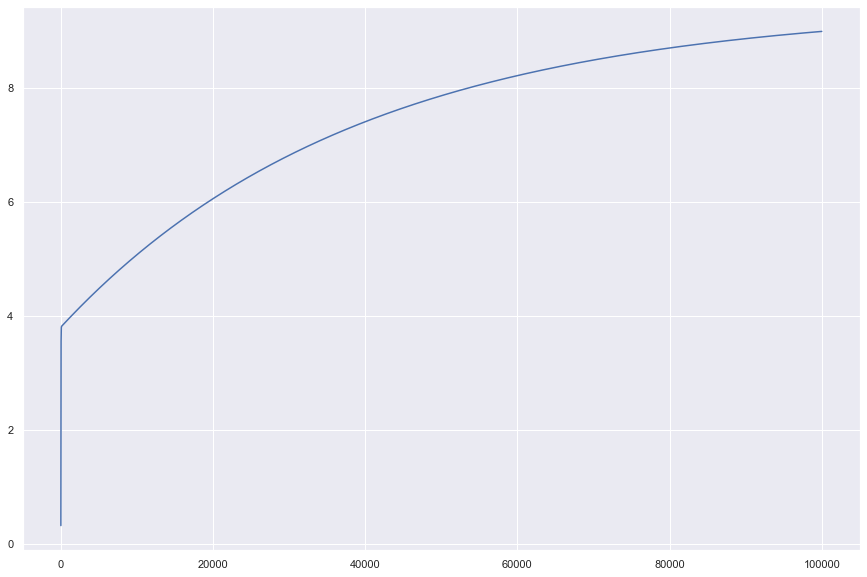

In [31]:
plt.plot(n, w_list)
plt.show()

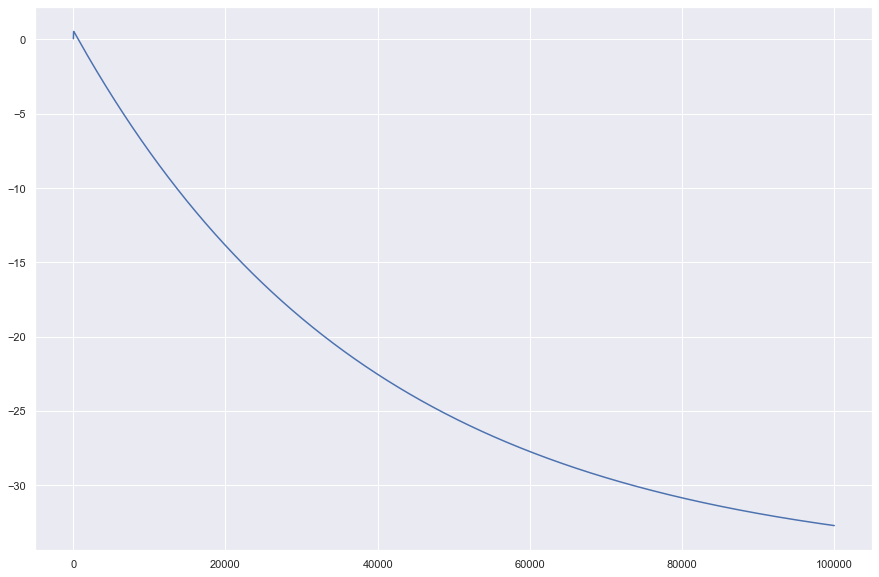

In [32]:
plt.plot(n, b_list)
plt.show()

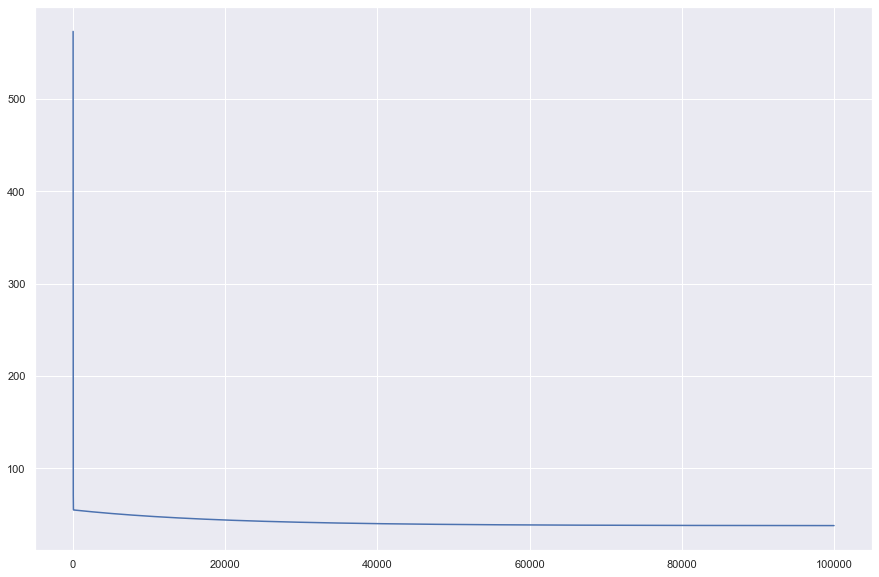

In [33]:
plt.plot(n, avg_loss_list)
plt.show()

In [34]:
predicted_vals = []
for feature in df["RM"]:
    predicted_vals.append(predict(feature, w, b))

In [35]:
predictedY_vs_realY = pd.DataFrame()

In [36]:
predictedY_vs_realY["REAL Y"] = df["MEDV"]
predictedY_vs_realY["PREDICTED Y"] = predicted_vals
predictedY_vs_realY["ERROR"] = abs(predictedY_vs_realY["REAL Y"] - predictedY_vs_realY["PREDICTED Y"])

In [37]:
predictedY_vs_realY.head()

,REAL Y,PREDICTED Y,ERROR
0,24.0,26.403783,2.403783
1,21.6,25.019137,3.419137
2,34.7,31.888423,2.811577
3,33.4,30.207066,3.192934
4,36.2,31.546757,4.653243


In [38]:
import imageio
with imageio.get_writer('Gradient_descent_RM_as_x_and_MEDV_target.gif', mode='I') as writer:
    for filename in img_list:
        image = imageio.imread(filename)
        writer.append_data(image)

epoch:  0 average loss:  495.0541787906524


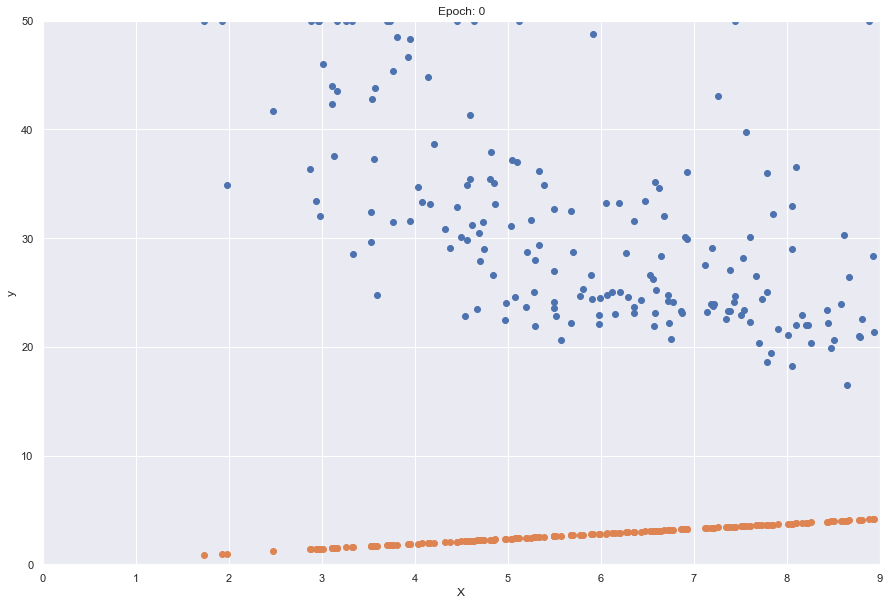

epoch:  5000 average loss:  44.196241167020766


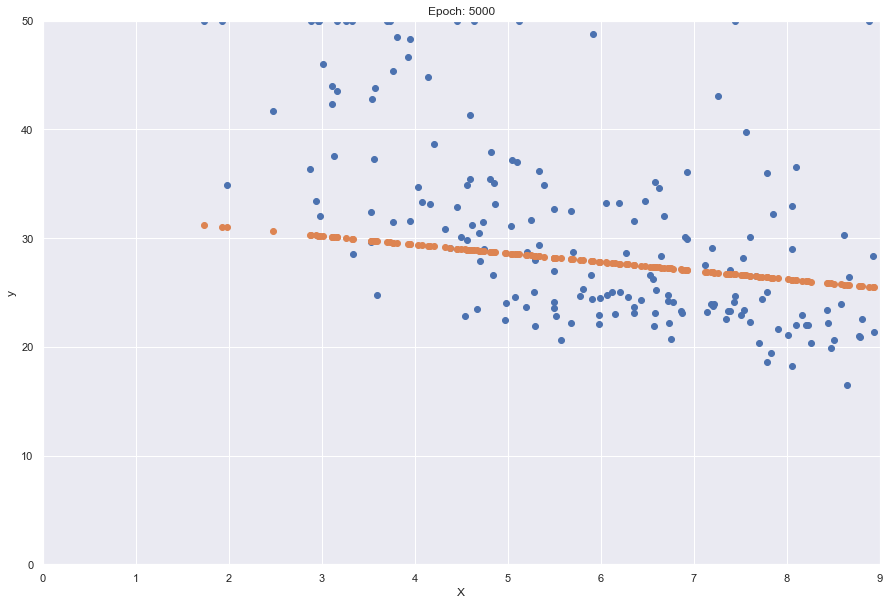

epoch:  10000 average loss:  42.56018550284604


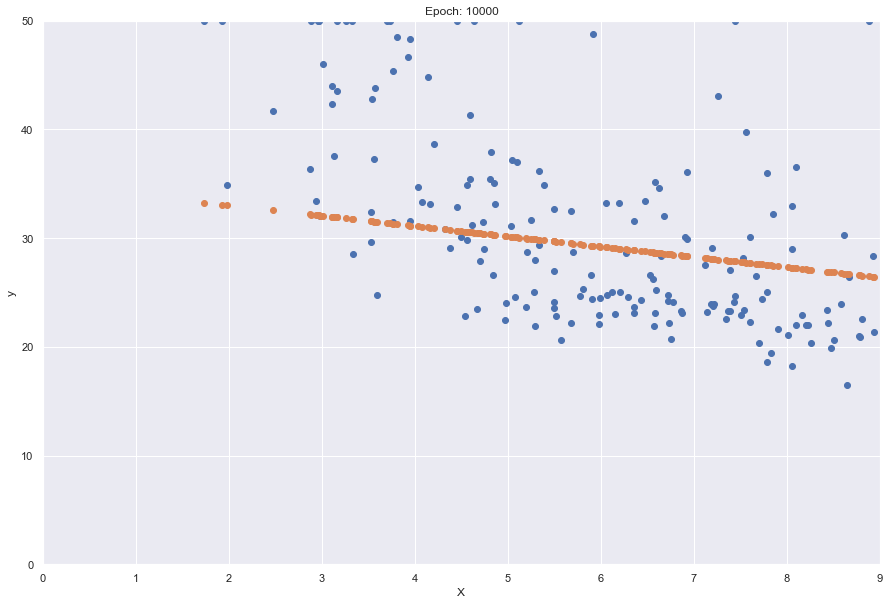

epoch:  15000 average loss:  42.55189355474301


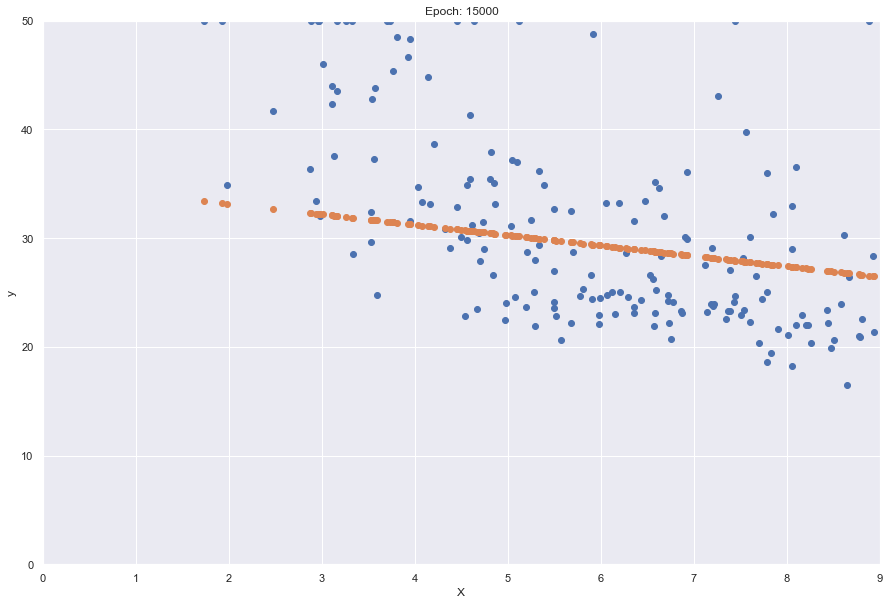

epoch:  20000 average loss:  42.5518515290315


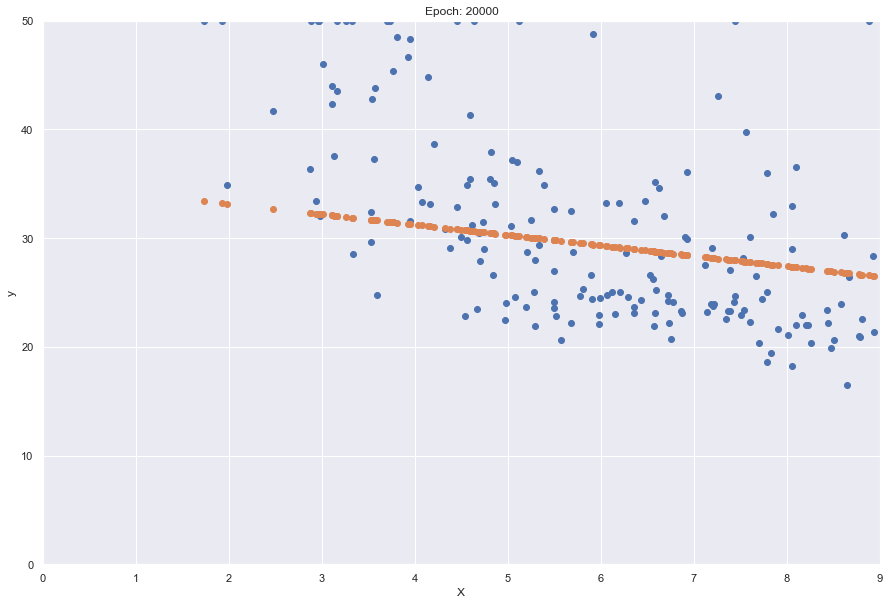

epoch:  25000 average loss:  42.551851316034465


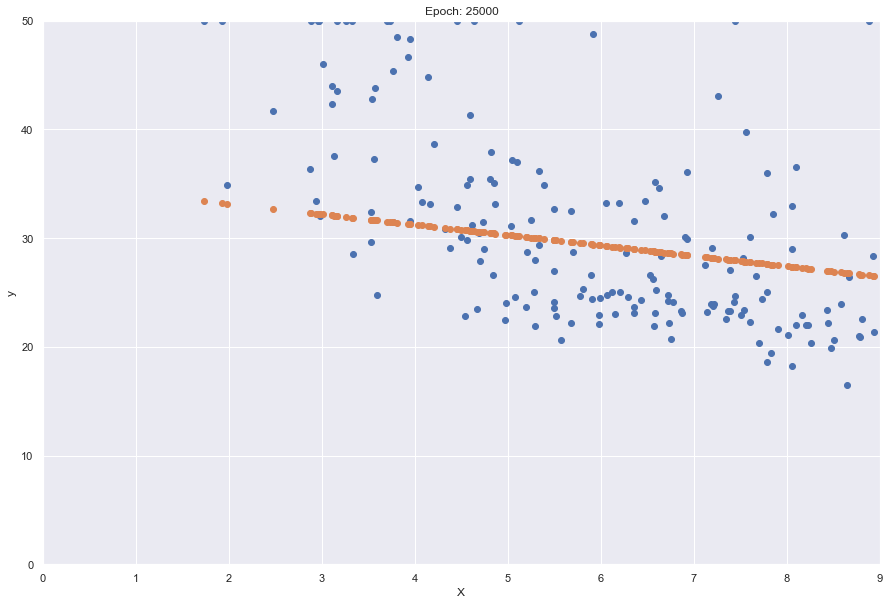

epoch:  30000 average loss:  42.55185131495494


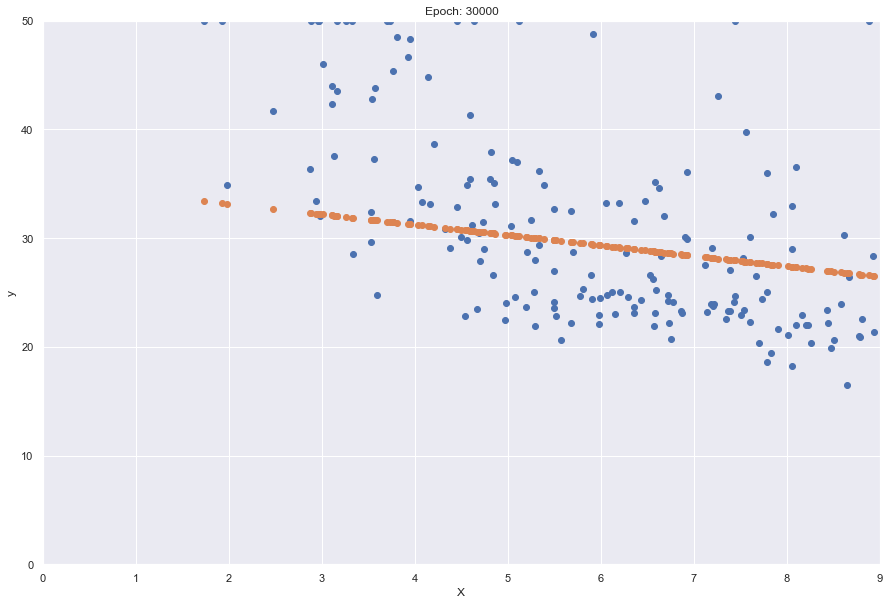

epoch:  35000 average loss:  42.55185131494943


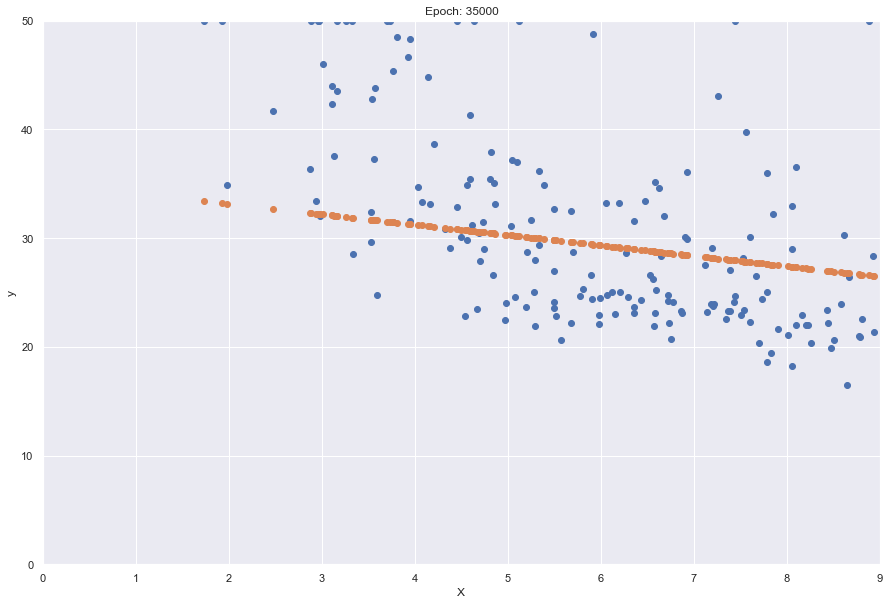

epoch:  40000 average loss:  42.55185131494944


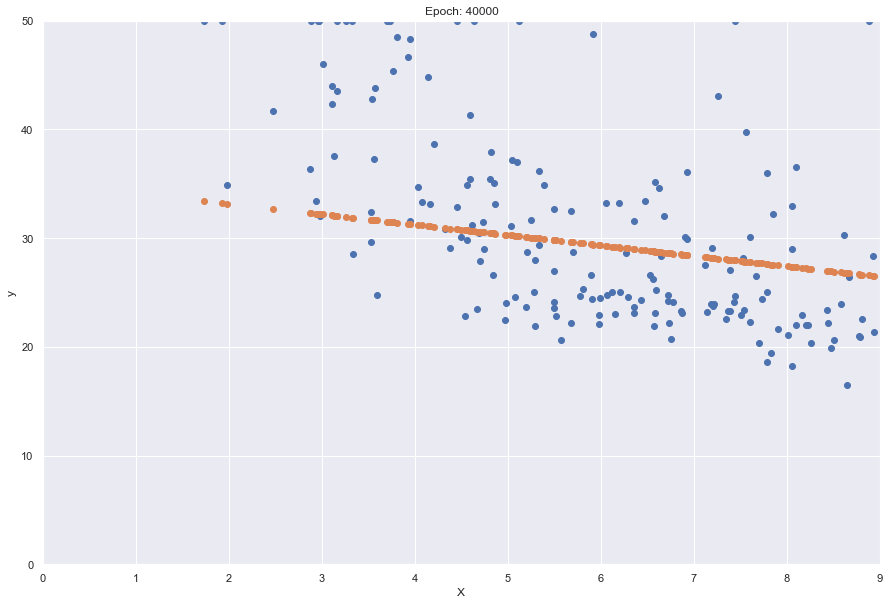

epoch:  45000 average loss:  42.55185131494942


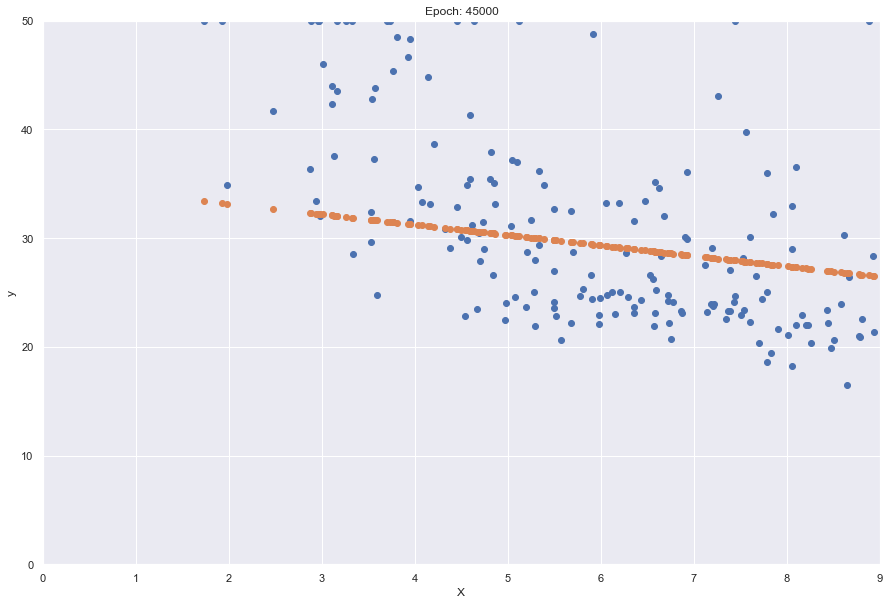

epoch:  50000 average loss:  42.55185131494943


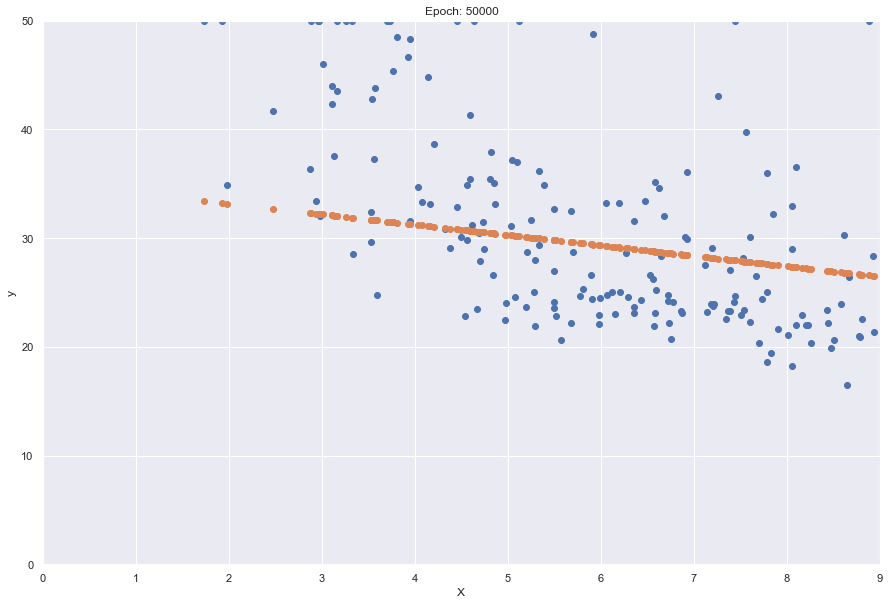

epoch:  55000 average loss:  42.55185131494945


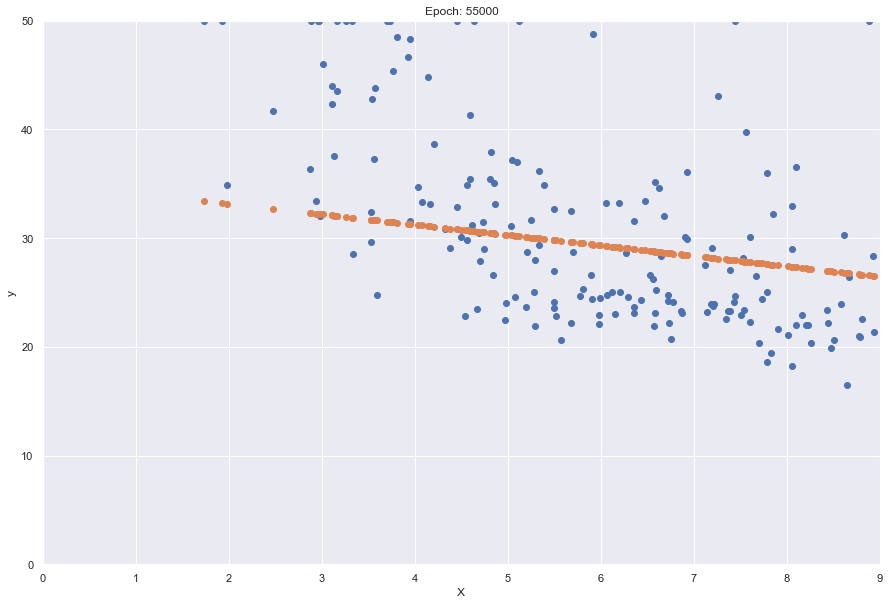

epoch:  60000 average loss:  42.551851314949474


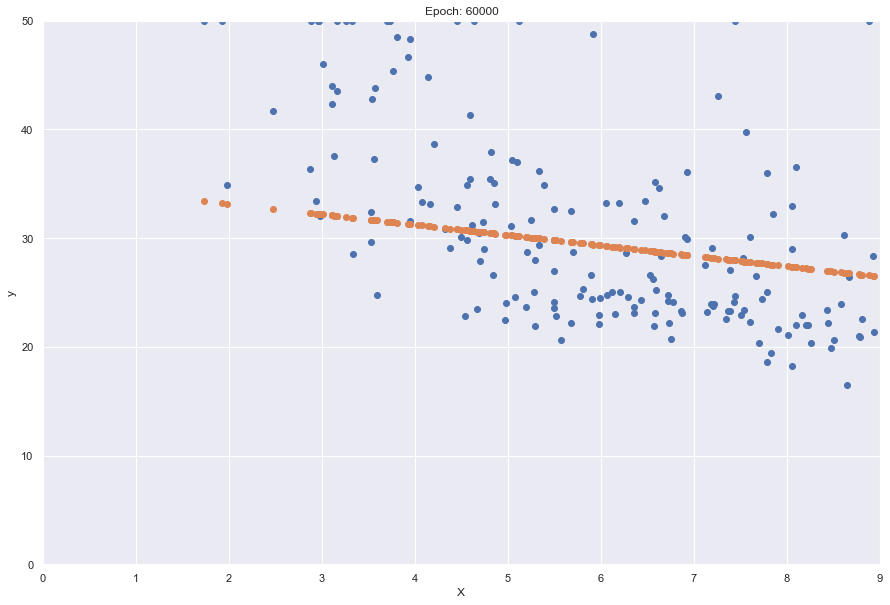

epoch:  65000 average loss:  42.551851314949474


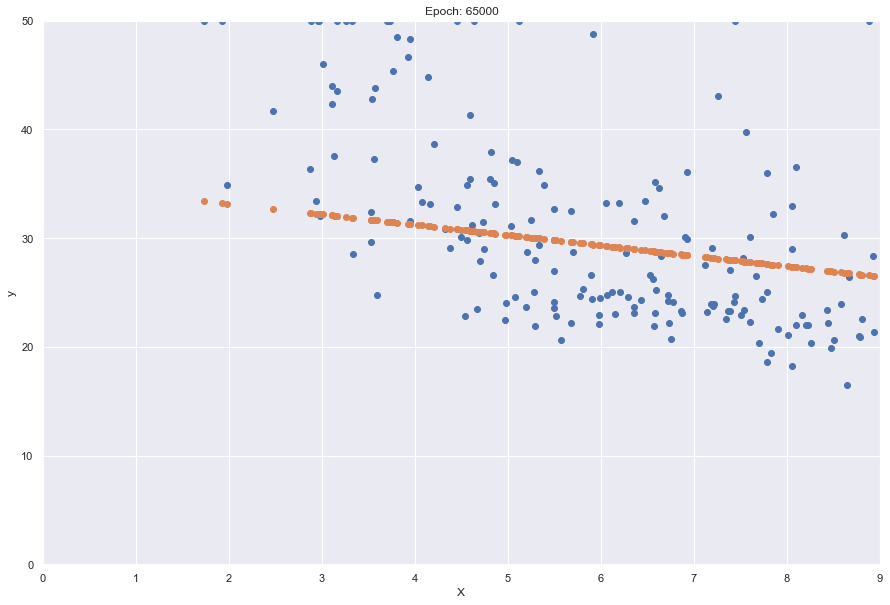

epoch:  70000 average loss:  42.551851314949474


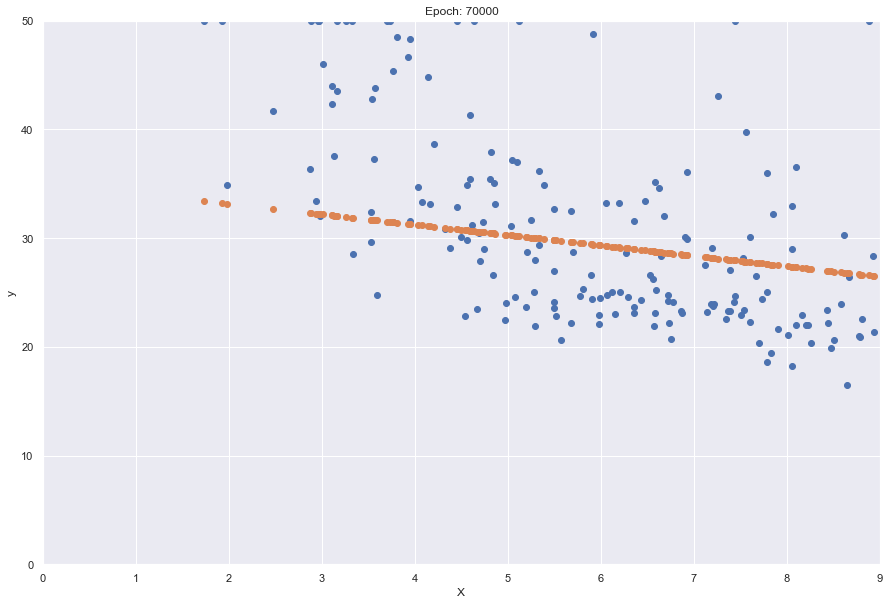

epoch:  75000 average loss:  42.551851314949474


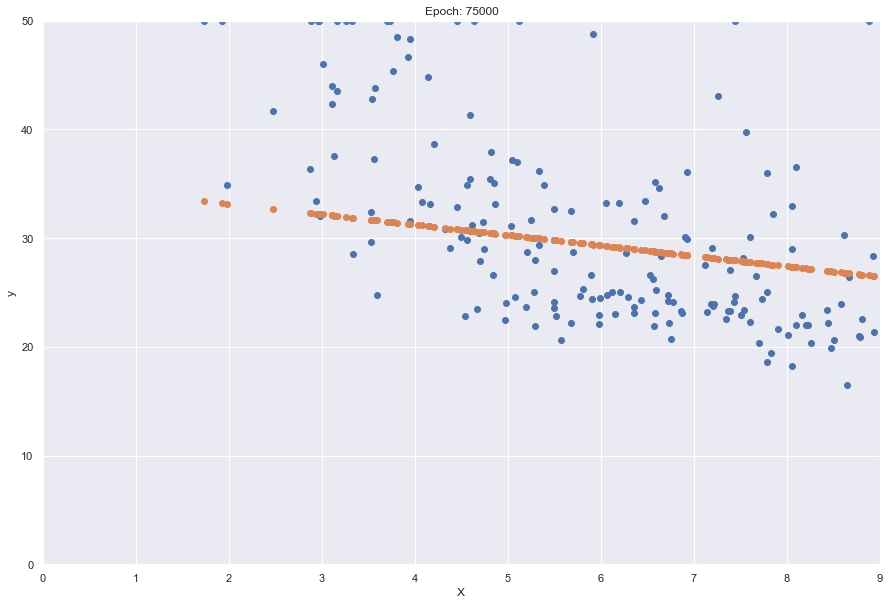

epoch:  80000 average loss:  42.551851314949474


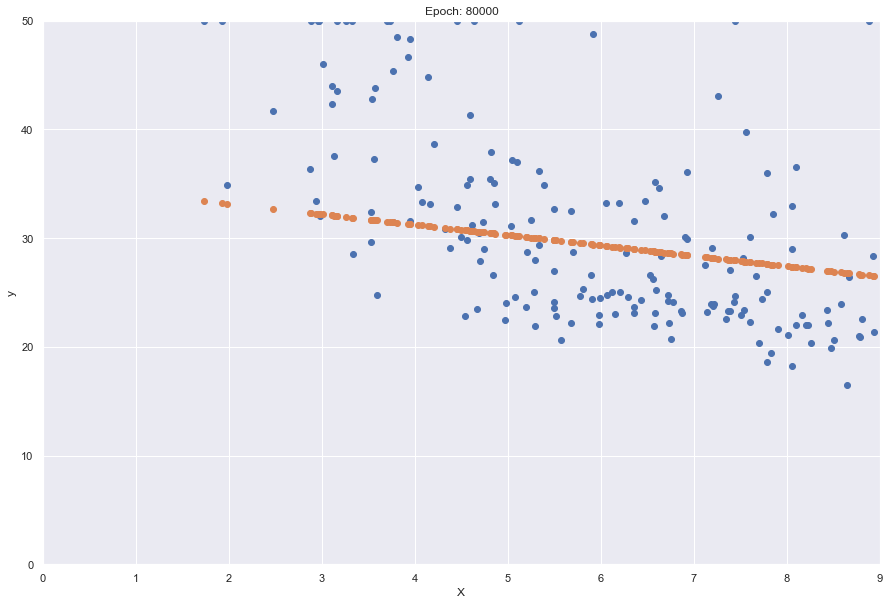

epoch:  85000 average loss:  42.551851314949474


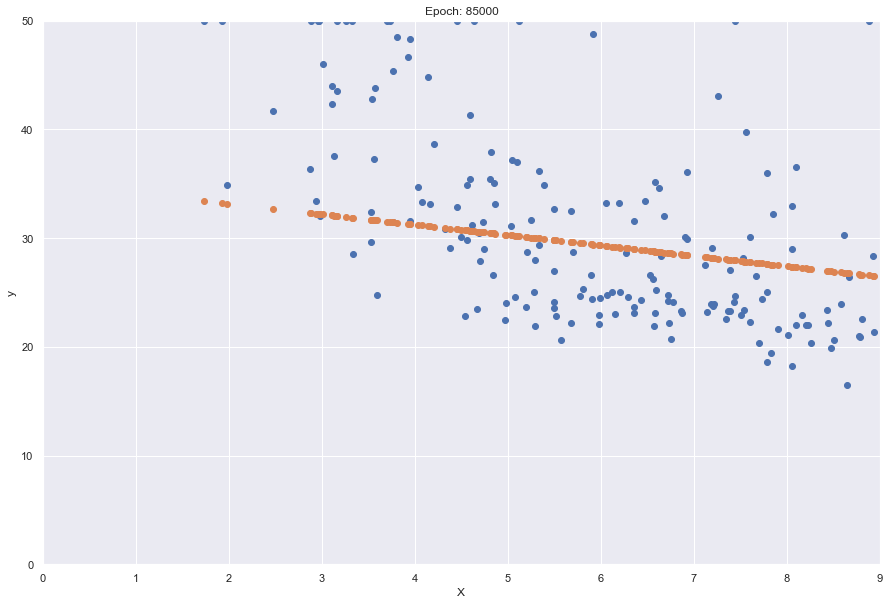

epoch:  90000 average loss:  42.551851314949474


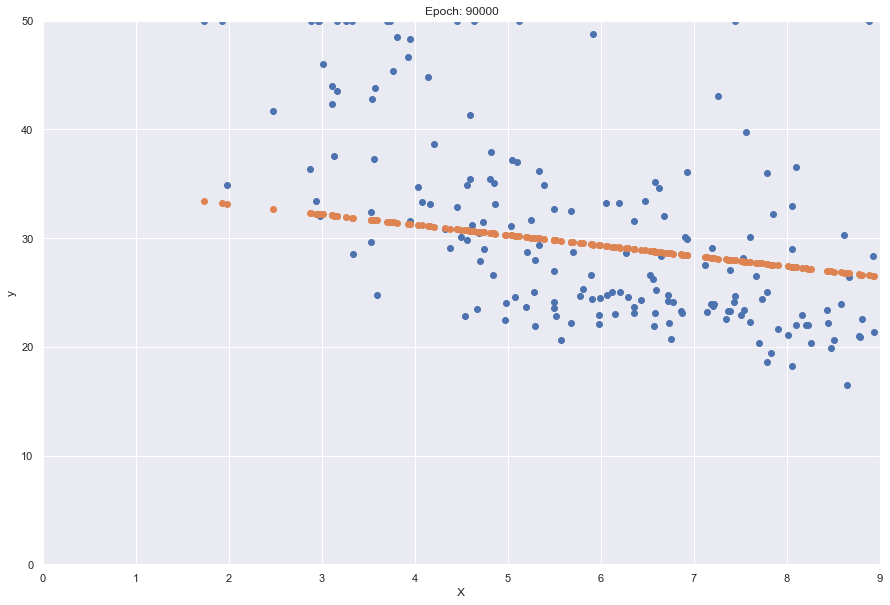

epoch:  95000 average loss:  42.551851314949474


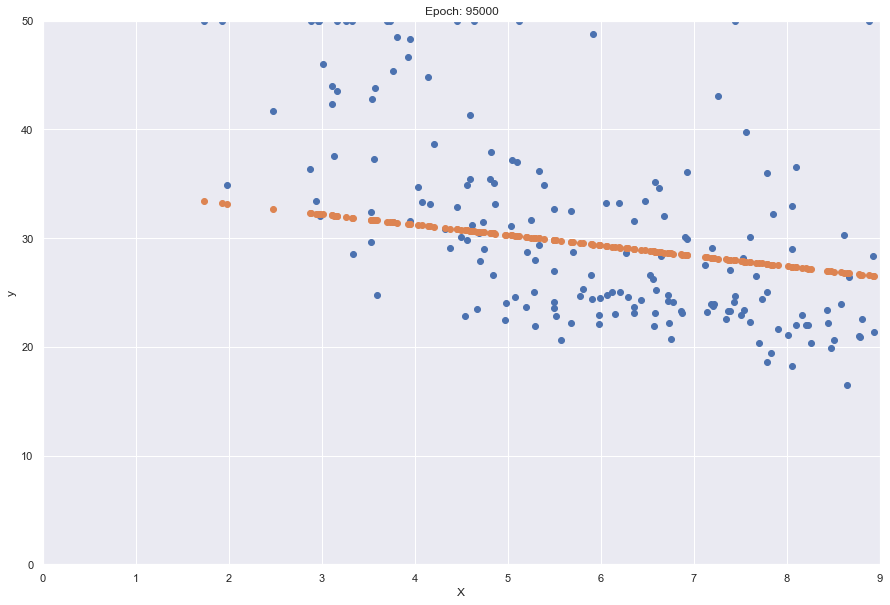

In [39]:
#now we will use "LSTAT" as x and "MEDV" is the target
w_list_LSTAT ,b_list_LSTAT, avg_loss_list_LSTAT, w_LSTAT, b_LSTAT, img_list_LSTAT, pred_val_at_diff_epoch_LSTAT = train(df["LSTAT"][0:403], df["MEDV"][0:403], 0, 0, 0.001, 100000)

In [42]:
print(len(w_list_LSTAT))
print(len(b_list_LSTAT))
print(len(avg_loss_list_LSTAT))
print("best value for w: ",w_LSTAT)
print("best value for b: ",b_LSTAT)
print(len(img_list_LSTAT))
print(len(pred_val_at_diff_epoch_LSTAT))

10000
10000
10000
best value for w:  -0.9582217625688175
best value for b:  35.075688509581866
20
20


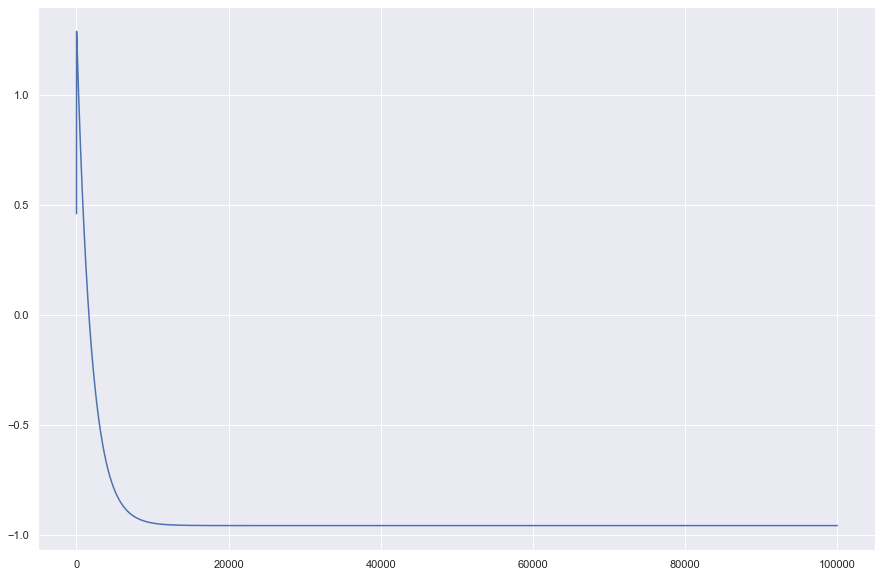

In [45]:
plt.plot(n, w_list_LSTAT)
plt.show()

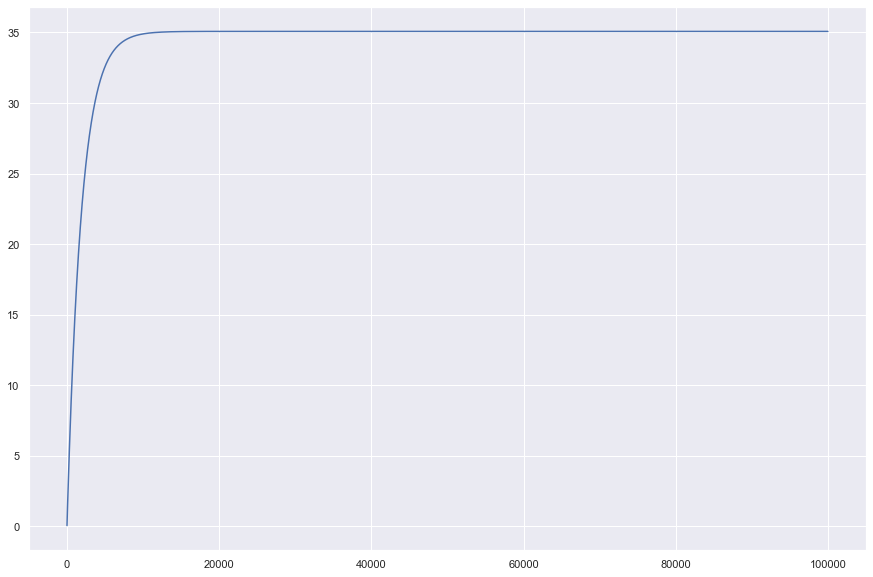

In [47]:
plt.plot(n, b_list_LSTAT)
plt.show()

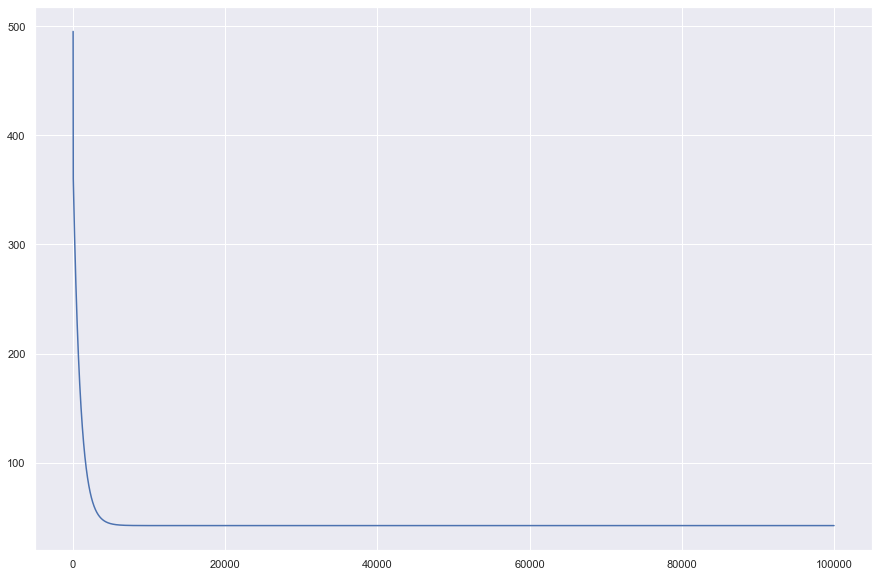

In [48]:
plt.plot(n, avg_loss_list_LSTAT)
plt.show()

In [49]:
predicted_vals = []
for feature in df["LSTAT"]:
    predicted_vals.append(predict(feature, w_LSTAT, b_LSTAT))

In [50]:
predictedY_vs_realY_LSTAT = pd.DataFrame()

In [51]:
predictedY_vs_realY_LSTAT["REAL Y"] = df["MEDV"]
predictedY_vs_realY_LSTAT["PREDICTED Y"] = predicted_vals
predictedY_vs_realY_LSTAT["ERROR"] = abs(predictedY_vs_realY_LSTAT["REAL Y"] - predictedY_vs_realY_LSTAT["PREDICTED Y"])

In [52]:
predictedY_vs_realY_LSTAT.head()

,REAL Y,PREDICTED Y,ERROR
0,24.0,30.303744,6.303744
1,21.6,26.317542,4.717542
2,34.7,31.214055,3.485945
3,33.4,32.258517,1.141483
4,36.2,29.968367,6.231633


In [53]:
import imageio
with imageio.get_writer('Gradient_descent_LSTAT_as_x_and_MEDV_target.gif', mode='I') as writer:
    for filename in img_list:
        image = imageio.imread(filename)
        writer.append_data(image)

# Linear regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
linr_model = LinearRegression()
#fit the model
linr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

train_prediction_LRtraining = linr_model.predict(X_train)
mse_LRtraining = mean_squared_error(y_train, train_prediction_LRtraining)
rmse_LRtraining = np.sqrt(mean_squared_error(y_train, train_prediction_LRtraining))
r2_LRtraining = r2_score(y_train, train_prediction_LRtraining)
print("Model performance on the training data")
print(f"Mean Squared Error: {mse_LRtraining}, Root Mean Squared Error: {rmse_LRtraining}, R2 score: {r2_LRtraining}")

print("\n")

test_prediction_LRtest = linr_model.predict(X_test)
mse_LRtest = mean_squared_error(y_test, test_prediction_LRtest)
rmse_LRtest = np.sqrt(mean_squared_error(y_test, test_prediction_LRtest))
r2_LRtest = r2_score(y_test, test_prediction_LRtest)
print("Model performance on the test data")
print(f"Mean Squared Error: {mse_LRtest}, Root Mean Squared Error: {rmse_LRtest}, R2 score: {r2_LRtest}")

Model performance on the training data
Mean Squared Error: 29.04701693132585, Root Mean Squared Error: 5.389528451666792, R2 score: 0.637746947879632


Model performance on the test data
Mean Squared Error: 36.42172875603049, Root Mean Squared Error: 6.035041736063678, R2 score: 0.6400551238836978


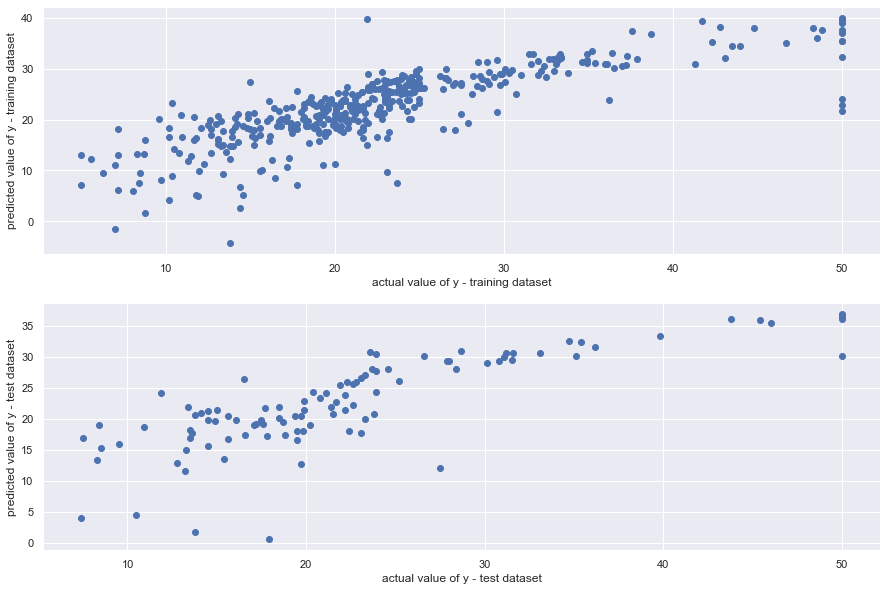

In [58]:
fig, ax = plt.subplots(2, figsize = (15, 10))
ax[0].scatter(y_train, train_prediction_LRtraining)
ax[0].set_xlabel("actual value of y - training dataset")
ax[0].set_ylabel("predicted value of y - training dataset")

ax[1].scatter(y_test, test_prediction_LRtest)
ax[1].set_xlabel("actual value of y - test dataset")
ax[1].set_ylabel("predicted value of y - test dataset")
plt.show()

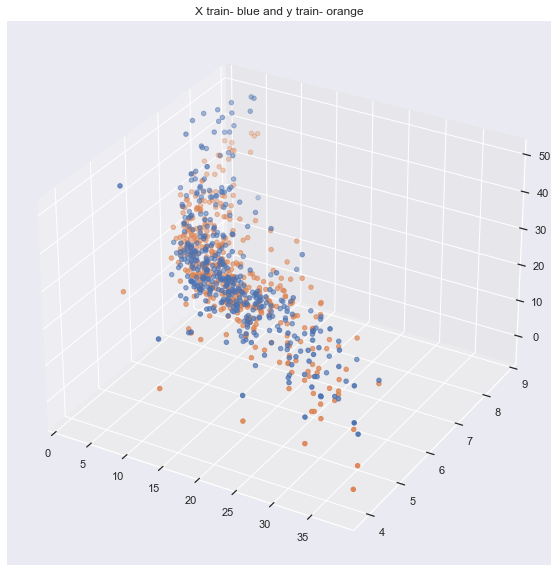

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("X train- blue and y train- orange")
ax.scatter3D(X_train["LSTAT"], X_train["RM"], y_train)
ax.scatter3D(X_train["LSTAT"], X_train["RM"], linr_model.predict(X_train))
plt.show()

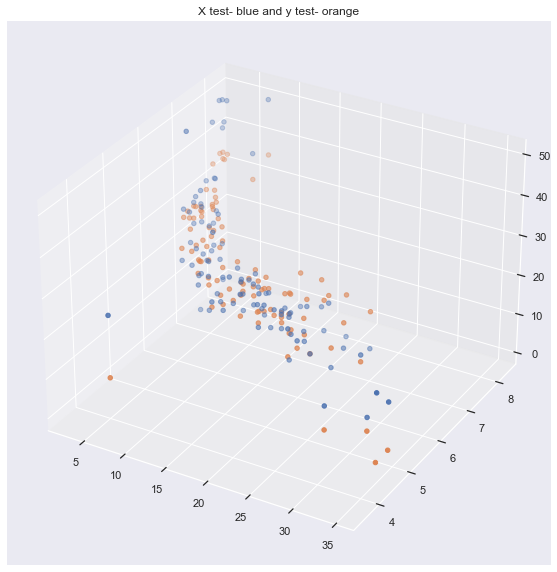

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("X test- blue and y test- orange")
ax.scatter3D(X_test["LSTAT"], X_test["RM"], y_test)
ax.scatter3D(X_test["LSTAT"], X_test["RM"], linr_model.predict(X_test))
plt.show()

# Polynomial regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

train_prediction_PRtraining = poly_model.predict(X_train_poly)

test_prediction_PRtest = poly_model.predict(poly_features.fit_transform(X_test))

mse_PRtraining = mean_squared_error(y_train, train_prediction_PRtraining)
rmse_PRtraining = np.sqrt(mean_squared_error(y_train, train_prediction_PRtraining))
r2_PRtraining = r2_score(y_train, train_prediction_PRtraining)
print("Model performance on the training data")
print(f"Mean Squared Error: {mse_PRtraining}, Root Mean Squared Error: {rmse_PRtraining}, R2 score: {r2_PRtraining}")

print("\n")

mse_PRtest = mean_squared_error(y_test, test_prediction_PRtest)
rmse_PRtest = np.sqrt(mean_squared_error(y_test, test_prediction_PRtest))
r2_PRtest = r2_score(y_test, test_prediction_PRtest)
print("Model performance on the test data")
print(f"Mean Squared Error: {mse_PRtest}, Root Mean Squared Error: {rmse_PRtest}, R2 score: {r2_PRtest}")

Model performance on the training data
Mean Squared Error: 21.26308967529669, Root Mean Squared Error: 4.611191784701292, R2 score: 0.7348223691749084


Model performance on the test data
Mean Squared Error: 18.224298240373223, Root Mean Squared Error: 4.268992649369781, R2 score: 0.819894799162943


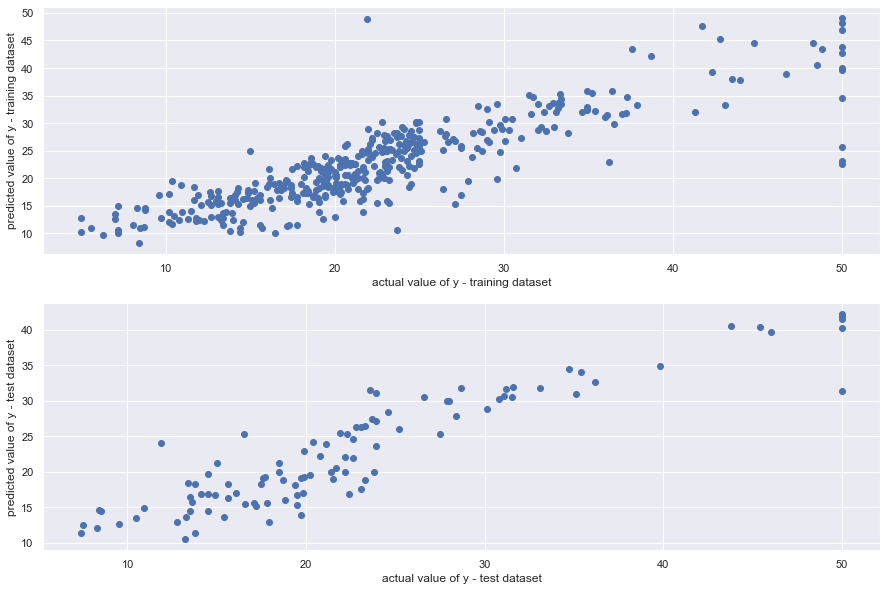

In [75]:
fig, ax = plt.subplots(2, figsize = (15, 10))
ax[0].scatter(y_train, train_prediction_PRtraining)
ax[0].set_xlabel("actual value of y - training dataset")
ax[0].set_ylabel("predicted value of y - training dataset")

ax[1].scatter(y_test, test_prediction_PRtest)
ax[1].set_xlabel("actual value of y - test dataset")
ax[1].set_ylabel("predicted value of y - test dataset")
plt.show()

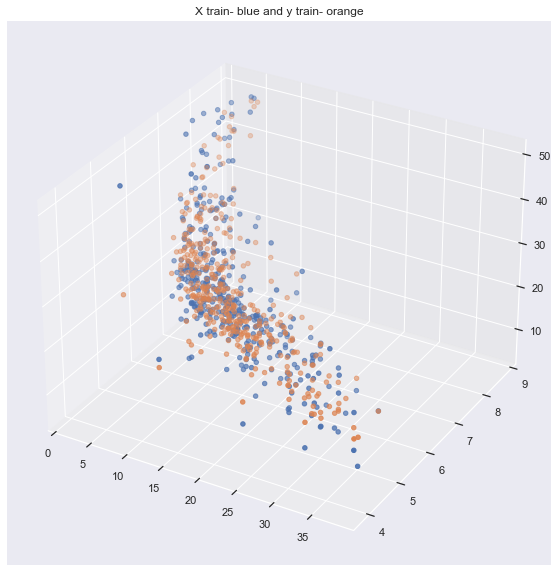

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("X train- blue and y train- orange")
ax.scatter3D(X_train["LSTAT"], X_train["RM"], y_train)
ax.scatter3D(X_train["LSTAT"], X_train["RM"], poly_model.predict(poly_features.fit_transform(X_train)))
plt.show()

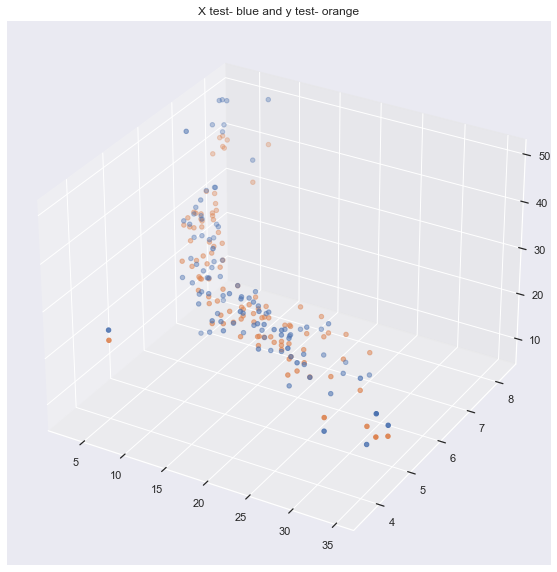

In [77]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("X test- blue and y test- orange")
ax.scatter3D(X_test["LSTAT"], X_test["RM"], y_test)
ax.scatter3D(X_test["LSTAT"], X_test["RM"], poly_model.predict(poly_features.fit_transform(X_test)))
plt.show()

# Random forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(random_state = 9)
rfmodel.fit(X_train, y_train)

<ipython-input-78-f4d32f9a2453>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor(random_state=9)

In [79]:
train_prediction_RFtraining = rfmodel.predict(X_train)
mse_RFtraining = mean_squared_error(y_train, train_prediction_RFtraining)
rmse_RFtraining = np.sqrt(mean_squared_error(y_train, train_prediction_RFtraining))
r2_RFtraining = r2_score(y_train, train_prediction_RFtraining)
print("Model performance on the training data")
print(f"Mean Squared Error: {mse_RFtraining}, Root Mean Squared Error: {rmse_RFtraining}, R2 score: {r2_RFtraining}")

print("\n")

test_prediction_RFtest = rfmodel.predict(X_test)
mse_RFtest = mean_squared_error(y_test, test_prediction_RFtest)
rmse_RFtest = np.sqrt(mean_squared_error(y_test, test_prediction_RFtest))
r2_RFtest = r2_score(y_test, test_prediction_RFtest)
print("Model performance on the test data")
print(f"Mean Squared Error: {mse_RFtest}, Root Mean Squared Error: {rmse_RFtest}, R2 score: {r2_RFtest}")

Model performance on the training data
Mean Squared Error: 3.9201402153465374, Root Mean Squared Error: 1.9799343967279668, R2 score: 0.951110891658634


Model performance on the test data
Mean Squared Error: 18.367128637254915, Root Mean Squared Error: 4.285688817127874, R2 score: 0.8184832497591352


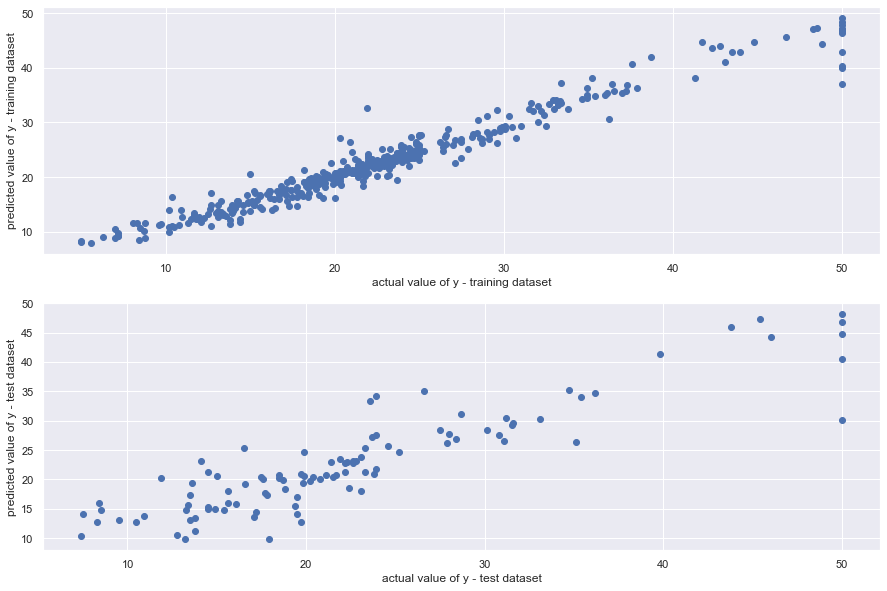

In [81]:
fig, ax = plt.subplots(2, figsize = (15, 10))
ax[0].scatter(y_train, train_prediction_RFtraining)
ax[0].set_xlabel("actual value of y - training dataset")
ax[0].set_ylabel("predicted value of y - training dataset")

ax[1].scatter(y_test, test_prediction_RFtest)
ax[1].set_xlabel("actual value of y - test dataset")
ax[1].set_ylabel("predicted value of y - test dataset")
plt.show()

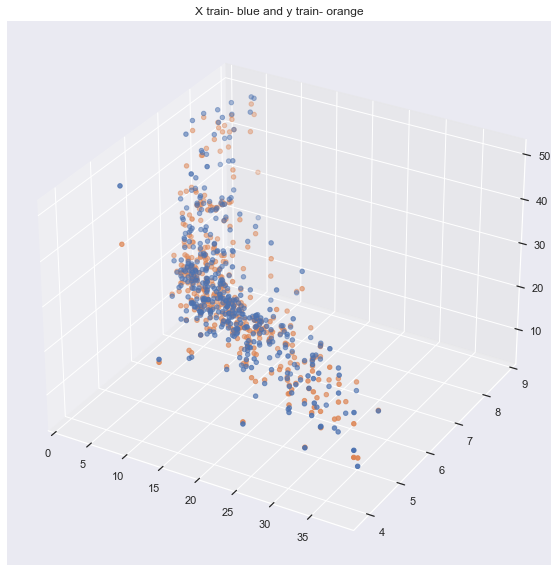

In [99]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("X train- blue and y train- orange")
ax.scatter3D(X_train["LSTAT"], X_train["RM"], y_train)
ax.scatter3D(X_train["LSTAT"], X_train["RM"], rfmodel.predict(X_train))
plt.show()

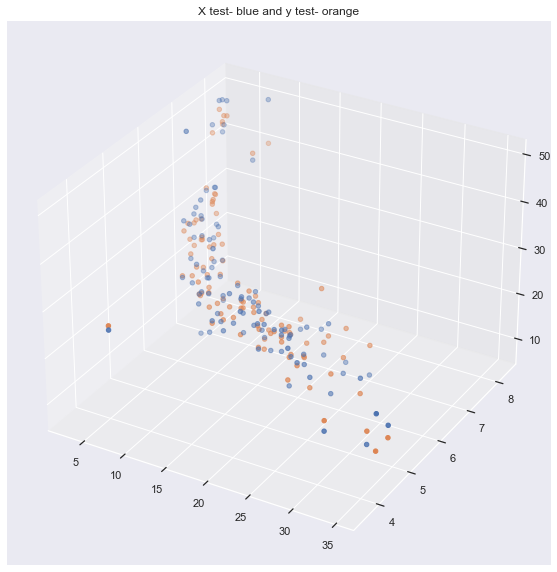

In [100]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("X test- blue and y test- orange")
ax.scatter3D(X_test["LSTAT"], X_test["RM"], y_test)
ax.scatter3D(X_test["LSTAT"], X_test["RM"], rfmodel.predict(X_test))
plt.show()

In [89]:
#which approach gives us the best solution for the test set?
predictions = pd.DataFrame()
predictions["REAL Y"] = y_test["MEDV"]
predictions["GD OUTPUT - RM"] = predict(X_test["RM"], w, b)
predictions["LR"] = test_prediction_LRtest
predictions["PR"] = test_prediction_PRtest
predictions["RF"] = test_prediction_RFtest

In [91]:
predictions.head()

,REAL Y,GD OUTPUT - RM,LR,PR,RF
464,21.4,23.113000,21.800402,19.932326,22.925
419,8.4,28.642595,19.035755,14.613623,15.940
277,33.1,28.660578,30.581096,31.813520,30.330
491,13.6,21.080986,17.633372,15.816440,19.372
337,18.5,20.289759,21.845725,21.257093,20.736
